In [1]:
path_to_mallet = '/Users/ryancheves/mallet-2.0.8/bin/mallet'

In [2]:
import little_mallet_wrapper
import os 
import shutil
import seaborn
import glob
from pathlib import Path

In [3]:
directory = "/Users/ryancheves/Dropbox (UFL)/AAHP UFDC/"

In [4]:
files = glob.glob(f"{directory}/*.txt")

In [5]:
training_data = []

for file in files:
    text = open(file, encoding='utf-8').read()
    processed_text = little_mallet_wrapper.process_string(text, numbers = 'remove')
    training_data.append(processed_text)

In [6]:
original_texts = []

for file in files:
    text = open(file, encoding = 'utf-8').read()
    original_texts.append(text)

In [7]:
#Additional stop words filtering. Test number 1

import spacy
from nltk.tokenize import word_tokenize
en_model = spacy.load('en_core_web_sm') #Are these even applicable to AAL?

stopwords = en_model.Defaults.stop_words
text_tokens = word_tokenize(processed_text) 
training_data.append(processed_text)
tokens_without_sw = [word for word in text_tokens if not word in stopwords]

#print(text_tokens)
print(tokens_without_sw)

['aahp', 'mcleod', 'page', 'samuel', 'proctor', 'oral', 'history', 'program', 'college', 'liberal', 'arts', 'sciences', 'program', 'director', 'paul', 'ortiz', 'joel', 'buchanan', 'archive', 'african', 'american', 'history', 'http', '//ufdc', 'ufl', 'edu/ohfb', 'pugh', 'hall', 'box', 'gainesville', 'https', '//oral', 'history', 'ufl', 'edu', 'aahp', 'horace', 'mcleod', 'african', 'american', 'history', 'project', 'aahp', 'interview', 'conducted', 'marna', 'weston', 'august', 'minutes', 'pages', 'abstract', 'interview', 'horace', 'mcleod', 'discusses', 'community', 'outreach', 'jerkins', 'community', 'center', 'perry', 'florida', 'describes', 'community', 'necessity', 'interact', 'education', 'plays', 'county', 'young', 'citizens', 'elderly', 'discusses', 'food', 'projects', 'clothes', 'outreach', 'poor', 'people', 'seniors', 'people', 'need', 'community', 'mcleod', 'talks', 'crucial', 'community', 'assistance', 'received', 'young', 'citizen', 'high', 'school', 'people', 'allowed', 'suc

In [8]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Count the frequency of each token
token_counts = Counter(tokens_without_sw)
#print(token_counts)

# Identify frequently occurring words
frequent_words = [word for word, count in token_counts.most_common(10)]
print(frequent_words)

# Evaluate the importance of each word
important_words = ["know", "got"]

# Create a stop word list
stop_words = set(stopwords.words('english') + frequent_words) - set(important_words)
print(stop_words)

['county', 'people', 'school', 'taylor', 'community', 'know', 'time', 'jerkins', 'leadership', 'got']
{'y', 'again', 'not', 'mustn', 'o', 'just', 'won', "hadn't", 'me', 'they', 'what', 'after', 'should', 'yourselves', 'of', 'both', 'community', 'between', 'its', 'no', "you're", 'your', 'yourself', "you'd", 'hers', 't', "you'll", 'himself', 'all', 'hadn', 'will', 'ma', 'shouldn', "wouldn't", 'needn', 'couldn', 'his', 'into', 'aren', 'here', 're', 'those', 'while', 'were', 'is', 'are', 'nor', 'm', 'ours', 'very', 'her', 'now', 'was', 'against', 'theirs', 'you', "shan't", 'he', "doesn't", 'further', 'mightn', 'when', 'd', 'at', 'being', 'doesn', 'by', 'these', 'any', 'than', 'with', "she's", 'during', 'once', 'there', 'down', 'the', 'll', 'this', 'did', 'so', 'over', "didn't", 'ain', "hasn't", "should've", 'i', 'does', 's', 'to', 'itself', 'yours', 'other', 'our', 'and', 'because', 'him', 'whom', 'didn', "don't", 've', 'can', 'on', 'be', 'if', 'school', 'them', "mightn't", 'ourselves', 'b

In [9]:
def rel_freq(x):
    freqs = [(value, x.count(value) / len(x)) for value in set(x)] 
    return freqs

In [10]:
rel_freq(tokens_without_sw)

[('liberal', 0.0004175365344467641),
 ('need', 0.003340292275574113),
 ('interviewer', 0.0004175365344467641),
 ('director', 0.0004175365344467641),
 ('corrections', 0.0004175365344467641),
 ('days', 0.0004175365344467641),
 ('negative', 0.0004175365344467641),
 ('communication', 0.0004175365344467641),
 ('internalizing', 0.0004175365344467641),
 ('asking', 0.0004175365344467641),
 ('correct', 0.0004175365344467641),
 ('protested', 0.0004175365344467641),
 ('care', 0.0008350730688935282),
 ('box', 0.0004175365344467641),
 ('community', 0.010855949895615866),
 ('telephone', 0.0004175365344467641),
 ('hallway', 0.0004175365344467641),
 ('grants', 0.0004175365344467641),
 ('creative', 0.0004175365344467641),
 ('young', 0.0029227557411273487),
 ('tomorrow', 0.0004175365344467641),
 ('paid', 0.0004175365344467641),
 ('jelly', 0.0008350730688935282),
 ('encouragement', 0.0004175365344467641),
 ('fraternities', 0.0008350730688935282),
 ('legacy', 0.0004175365344467641),
 ('pleasure', 0.000417

In [11]:
interview_titles = [Path(file).stem for file in files]

In [12]:
interview_titles

['AAHP 213 Eyvonne Andrews 11-10-2011ufdc',
 'AAHP 526 Sharon Glover 10-7-2017',
 'AAHP 398 Louissteen Cummings 1-29-2016ufdc',
 'AAHP 672A LaFanette Soles-Woods 7-6-2019ufdc',
 'AAHP 337 Rose Marshall 5-17-2014ufdc',
 'AAHP 193 Charles Demps 10-4-2011ufdc',
 'AAHP 408 Leoris Richardson 5-12-2016ufdc',
 'AAHP 039 Lee Bailey 2-7-2009ufdc',
 'AAHP 385B William James 3-27-2018ufdc',
 'AAHP 567 Betty Stevens 1-1-2018ufdc',
 'AAHP 437 Johnny Hunter 10-19-2015ufdc',
 'AAHP 292C Isaiah Branton 4-15-2013dr',
 'AAHP 242 Claretha Bradley 1-15-2012ufdc',
 'AAHP 327 Charles Bryant 4-25-2014ufdc',
 'AAHP 436 Jetson Grimes 9-4-2015ufdc',
 'AAHP 508 Gordon Carey 6-14-2017ufdc',
 'AAHP 306 George Abungu 5-15-2013ufdc',
 'AAHP 634 Sallie Hollis 2-18-2019ufdc',
 'AAHP 252 Isaiah Branton 03-09-2012ufdc',
 'AAHP 198 Isaac Jones 10-20-2011ufdc',
 'AAHP 555 William Ferrell 3-7-2018ufdc',
 'AAHP 078 Tonyaa Weathersbee 9-5-2009ufdc',
 'AAHP 317 Lorene Smith 9-16-13ufdc',
 'AAHP 669B Bryan Stevenson Speech 6-2

In [13]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 900
Mean Number of Words per Document: 3557.4
Vocabulary Size: 40571


In [14]:
num_topics = 15
training_data = tokens_without_sw

In [15]:
output_directory_path = 'Users/ryancheves'

Path(f"{output_directory_path}").mkdir(parents = True, exist_ok=True)

#path_to_stopwords               = f"{output_directory_path}/my_stop_words.txt"
path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"

In [16]:
little_mallet_wrapper.quick_train_topic_model(path_to_mallet,
                                             output_directory_path,
                                             num_topics,
                                             training_data)

Importing data...
Complete
Training topic model...


Mallet LDA: 15 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 1
total tokens: 2392
<10> LL/token: -11.36443
<20> LL/token: -11.34915
<30> LL/token: -11.4168
<40> LL/token: -11.37035

0	0.33333	history african program living talked american daughter rooms left took cetera place kappas systems sixth additional happened access county stay 
1	0.33333	time certainly year sit american lewis little minister math paper and/or fraternities provide teach accomplish better stand capacity mind town 
2	0.33333	learn think board kind yes taught gave tell reproductive help classroom laughter sitting adult improvement cuffs wore disciplinary teach stop 
3	0.33333	jerkins good facility center find mill sure reverend young grade couple fear acres council aahp guys numerals roman cecum live 
4	0.33333	people facility use social buy programs proctor graduates management broward ask thought tend church property owned coming fantastic document conclude 
5	0.33333	taught lot interview went st

[beta: 0.16259] 
<320> LL/token: -11.9188
[beta: 0.16101] 
<330> LL/token: -11.87384
[beta: 0.16958] 
<340> LL/token: -11.90331

0	0.14881	social coming taylor wore welding makes cetera access died recipe charge basically essential lawyers compare act chattahoochee til goal communicate 
1	0.50613	body foley sure went african like living think want right talk lot use life interview psi younger today equipment didn 
2	0.17108	school classroom away paper bus tend office black entire marker audio hesitate document alphas case plenty huges henderson institutions custom 
3	0.70575	know school got county system taught facility taylor services come weekend character words years florida campus omega accomplish yes talk 
4	0.43057	people county said facility coach board years community south oral daughter worked teach taught called incredible visit miles economic effect 
5	0.14434	ufl wasn felt couple fantastic ryan final research conclude stood sigmas greatest wear baptist gives instruction lau

<770> LL/token: -11.82081
[beta: 0.32122] 
<780> LL/token: -11.79149
[beta: 0.32975] 
<790> LL/token: -11.77555

0	0.18577	words rooms alphas classroom cetera step giving essential provide brightest places suits cuffs wear group minster mission dad fish language 
1	0.21364	attached gentlemen dictate let ryan cristina son organizations case probably benefit institutions educational sits communities greatest encouraged values sound examples 
2	0.19404	opportunities necessarily got council classmates corrections csx finishing plenty bear possibilities integral arena figure muscular phalanges bone oscar field geometry 
3	0.33	science foley kappas henderson body human coach learned fact bus yes left asked mill state head property loughridge february morini 
4	0.19402	math small health term barbecue kappas foundation love concluding resources physics gerard towns goal auditory bones promoted greyhound path ignored 
5	0.29692	mccloud phi indictment turner classrooms today moved happened oral 

Complete


([['yes',
   'travel',
   'phi',
   'minister',
   'night',
   'health',
   'try',
   'run',
   'maybe',
   'schools',
   'mccloud',
   'history',
   'works',
   'son',
   'strong',
   'prior',
   'pale',
   'gerard',
   'stayed',
   'stay'],
  ['city',
   'dad',
   'sure',
   'town',
   'funding',
   'liz',
   'earth',
   'hold',
   'love',
   'daddy',
   'probably',
   'lawyers',
   'university',
   'lifestyle',
   'honest',
   'credential',
   'birth',
   'mission',
   'surely',
   'yeah'],
  ['allow',
   'institutions',
   'necessarily',
   'foley',
   'members',
   'activity',
   'discusses',
   'ear',
   'bent',
   'files',
   'csx',
   'reflections',
   'conclude',
   'love',
   'resources',
   'phd',
   'scientists',
   'best',
   'running',
   'leave'],
  ['vision',
   'sauce',
   'disciplinary',
   'attached',
   'wasn',
   'stand',
   'renovated',
   'needed',
   'head',
   'willing',
   'great',
   'ryan',
   'edited',
   'line',
   'crazy',
   'colleagues',
   'friends',
 

In [17]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

for topic_number, topic in enumerate(topics):
    print(f"Topic {topic_number}\n\n{topic}\n")

Topic 0

['yes', 'travel', 'phi', 'minister', 'night', 'health', 'try', 'run', 'maybe', 'schools', 'mccloud', 'history', 'works', 'son', 'strong', 'prior', 'pale', 'gerard', 'stayed', 'stay']

Topic 1

['city', 'dad', 'sure', 'town', 'funding', 'liz', 'earth', 'hold', 'love', 'daddy', 'probably', 'lawyers', 'university', 'lifestyle', 'honest', 'credential', 'birth', 'mission', 'surely', 'yeah']

Topic 2

['allow', 'institutions', 'necessarily', 'foley', 'members', 'activity', 'discusses', 'ear', 'bent', 'files', 'csx', 'reflections', 'conclude', 'love', 'resources', 'phd', 'scientists', 'best', 'running', 'leave']

Topic 3

['vision', 'sauce', 'disciplinary', 'attached', 'wasn', 'stand', 'renovated', 'needed', 'head', 'willing', 'great', 'ryan', 'edited', 'line', 'crazy', 'colleagues', 'friends', 'fraternities', 'phi', 'benefit']

Topic 4

['bump', 'gray', 'listen', 'alpha', 'nasa', 'shirt', 'mistake', 'establish', 'greek', 'roman', 'yeah', 'encouragement', 'ask', 'hate', 'said', 'thou

In [18]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

In [19]:
topic_distributions[32]

[0.14318203414994182,
 0.028045580671660946,
 0.03433889953628029,
 0.03664855407256215,
 0.015193497205892088,
 0.03564078077868092,
 0.042242608570898295,
 0.01915157429803504,
 0.026413562170904202,
 0.029385488105309984,
 0.02045442533382774,
 0.1359261099148378,
 0.02442583495525713,
 0.4063113410708492,
 0.0026397091650623475]

In [20]:
interview_to_check = "AAHP 327 Charles Bryant 4-25-2014ufdc"

interview_number = interview_titles.index(interview_to_check)

print(f"Topic Distributions for {interview_titles[interview_number]}\n")
for topic_number, (topic, topic_distribution) in enumerate(zip(topics, topic_distributions[interview_number])):
    print(f"Topic {topic_number} {topic[:6]} \nProbability: {round(topic_distribution, 3)}\n")

Topic Distributions for AAHP 327 Charles Bryant 4-25-2014ufdc

Topic 0 ['yes', 'travel', 'phi', 'minister', 'night', 'health'] 
Probability: 0.038

Topic 1 ['city', 'dad', 'sure', 'town', 'funding', 'liz'] 
Probability: 0.028

Topic 2 ['allow', 'institutions', 'necessarily', 'foley', 'members', 'activity'] 
Probability: 0.034

Topic 3 ['vision', 'sauce', 'disciplinary', 'attached', 'wasn', 'stand'] 
Probability: 0.037

Topic 4 ['bump', 'gray', 'listen', 'alpha', 'nasa', 'shirt'] 
Probability: 0.015

Topic 5 ['kappas', 'goal', 'kids', 'transportation', 'twice', 'let'] 
Probability: 0.036

Topic 6 ['horace', 'thing', 'reverend', 'asked', 'alphas', 'management'] 
Probability: 0.042

Topic 7 ['daughter', 'thing', 'broward', 'looked', 'wanted', 'aside'] 
Probability: 0.124

Topic 8 ['sure', 'graduates', 'character', 'important', 'senior', 'bring'] 
Probability: 0.026

Topic 9 ['cecum', 'coach', 'worked', 'home', 'place', 'coming'] 
Probability: 0.029

Topic 10 ['graduated', 'accomplish', 'f

Heatmap of Topics and Texts

In [21]:
import random
target_labels = random.sample(interview_titles, 10)

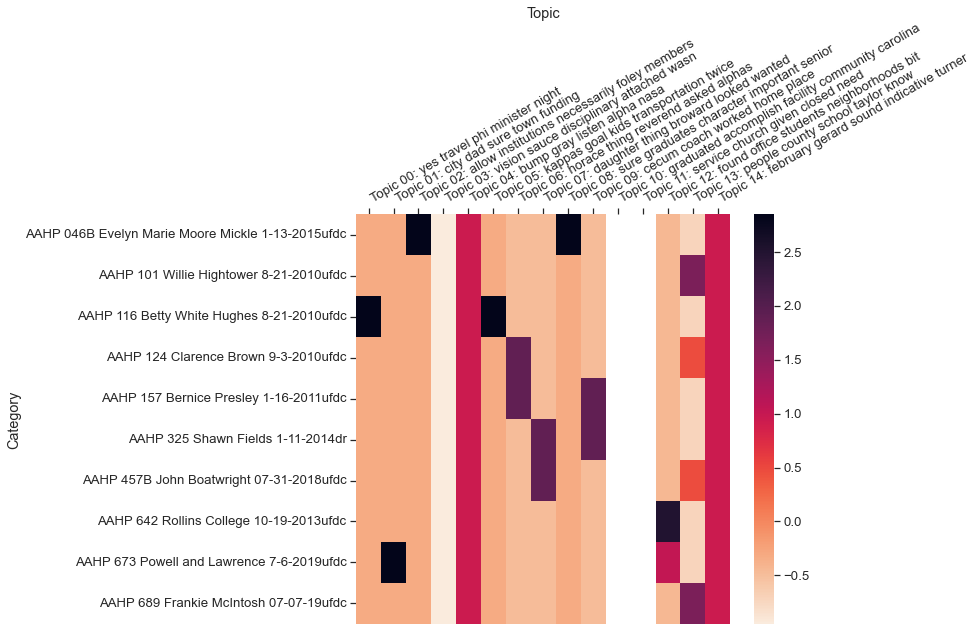

In [22]:
little_mallet_wrapper.plot_categories_by_topics_heatmap(interview_titles,
                                      topic_distributions,
                                      topics, 
                                      output_directory_path + '/categories_by_topics.pdf',
                                      target_labels=target_labels,
                                      dim= (13, 9)
                                                       )

Top Interviews per Topic

In [23]:
training_data_interview_titles = dict(zip(training_data, interview_titles))
training_data_original_text = dict(zip(training_data, original_texts))

In [24]:
def display_top_interviews_per_topic(topic_number=0, number_of_documents=1):
    
    print(f"Topic {topic_number}\n\n{topics[topic_number]}\n")

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n = number_of_documents):
        print(round(probability, 4), training_data_interview_titles[document] + "\n")
    return

In [25]:
display_top_interviews_per_topic(topic_number=0, number_of_documents=5)

Topic 0

['yes', 'travel', 'phi', 'minister', 'night', 'health', 'try', 'run', 'maybe', 'schools', 'mccloud', 'history', 'works', 'son', 'strong', 'prior', 'pale', 'gerard', 'stayed', 'stay']

0.2484 AAHP 704 Eddie Thomas 7-12-2019ufdc



KeyError: 'strong'

In [26]:
display_top_interviews_per_topic(topic_number=9, number_of_documents=5)

Topic 9

['cecum', 'coach', 'worked', 'home', 'place', 'coming', 'life', 'morini', 'hesitate', 'hospital', 'doctorate', 'sauce', 'exactly', 'ike', 'henderson', 'compare', 'tax', 'reaching', 'bout', 'talking']



KeyError: 'tax'

In [27]:
display_top_interviews_per_topic(topic_number = 8, number_of_documents = 7)

Topic 8

['sure', 'graduates', 'character', 'important', 'senior', 'bring', 'mcleod', 'aahp', 'cristina', 'corrections', 'engineer', 'finishing', 'died', 'building', 'comparison', 'extent', 'children', 'sleeve', 'wore', 'watching']



KeyError: 'watching'

Topic Words in Context

In [28]:
from IPython.display import Markdown, display
import re

def display_bolded_topic_words_in_context(topic_number=3, number_of_documents=3, custom_words=None):

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        
        print(f"Topic {topic_number}\n\n{topics[topic_number]}\n")
        
        probability = f"\n\n**{probability}**"
        interview_title = f"**{training_data_interview_titles[document]}**"
        original_text = training_data_original_text[document]
        topic_words = topics[topic_number]
        topic_words = custom_words if custom_words != None else topic_words

        for word in topic_words:
            if word in original_text:
                original_text = re.sub(f"\\b{word}\\b", f"**{word}**", original_text)

        display(Markdown(probability)), display(Markdown(interview_title)), display(Markdown(original_text))
    return

In [29]:
display_bolded_topic_words_in_context(topic_number = 3, number_of_documents = 3)

Topic 3

['vision', 'sauce', 'disciplinary', 'attached', 'wasn', 'stand', 'renovated', 'needed', 'head', 'willing', 'great', 'ryan', 'edited', 'line', 'crazy', 'colleagues', 'friends', 'fraternities', 'phi', 'benefit']





**0.2470665363201416**

**AAHP 776 Michael Roberts 2-29-20ufdc**

AAHP 776; Roberts; Page 10







Samuel Proctor Oral History Program College of Liberal Arts and Sciences Program Director: Dr. Paul Ortiz








241 Pugh Hall

PO Box 115215

Gainesville, FL 32611

(352) 392-7168

https://oral.history.ufl.edu







AAHP 776 Michael Roberts 2-29-2020 Interviewed by Paul Ortiz on February 29, 2020 56 minutes | 38 pages



Abstract: In this interview, Dr. Paul Ortiz sits down with Pensacola native Michael Roberts, who recalls his life and education in Pensacola, Florida. Michael remembers attending segregated schools for first and second grade, and then transitioning to integrated schooling at CA Weis Elementary School. Roberts attended Brentwood Middle School, an integrated institution, and then went on to Escambia High School. He graduated from Florida State University in 1980 and went on to attend graduate school at the same institution. He went on to receive a doctoral degree from the University of West Florida in Pensacola. Roberts remembers the painstaking efforts that his mother endured to raise him alone after the death of his father when Roberts was still in elementary school. He also remembers the hardship brought on by his brother’s death in a motorcycle accident, which left his remaining brother as his only male role model.

Roberts discusses his current work as the principal of Booker T. Washington High School, a historically Black institution in Pensacola. Roberts explains some of the significance of Washington High School in the local community, remembering how the school’s name—and therefore, legacy—was almost lost during integration. Roberts then goes on to recall the turmoil he experienced as a student during the integration of Escambia High School. Particularly, Roberts recalls the successful effort to change the school’s mascot from the “Rebels,” to discontinue the use of Dixie-inspired fight songs, and to remove Confederate flags from the school campus. Roberts concludes with his philosophies on education as the principal of Booker T. Washington High School.



Keywords: [Pensacola, Florida, Black community, education, segregation, integration, Booker T. Washington High School, Escambia High School, educator]



AAHP 776

Interviewee: Michael Roberts Interviewer: Paul Ortiz

Date: February 29, 2020

	O:	So we are here at the Branch Library of Pensacola, Mr. Roberts is with us—Mr. Michael Roberts—thank you so much for coming in and taking time out of your day—

	R:	You are welcome. I am honored to be here.



	O:	Thank you sir. And my name is Dr. Paul Ortiz, also with Sebastiano, so Mr.



Roberts I was wondering before we start if you could tell me kind of about around the time you were born, growing up, what life was like as a young boy growing up in the area.

	R:	Okay. I’m a native Pensacolian, I grew up, was born, and raised here. Born at— I’m trying to think of the name of the hospital, when I was born there was segregation, so it was a hospital for African Americans which was—oh gosh, it escapes me—Ladies of Angels Hospital, which is still a clinic now owned and operated by the Catholic Diocese. I was born in 1957 right here in Pensacola Florida. I am one of four siblings. I am a product of—and I say it with pride, public education. My first grade was at Golen Elementary, which was a segregated elementary school. Second grade was at Olive Elementary, which is now Lincoln Park Elementary. And then all of my other years were in integrated schools. I did the rest of my elementary schooling at C. A. Wise, which was where I went third, fourth, and fifth.

	O:	And that was integrated?



	R:	Integrated. Yes, yes, integrated. Sixth, seventh and eighth, Brentwood Middle School. Integrated. I did high school ninth, tenth, eleventh, and twelfth at Escambia High School, graduated in 1976, left here and went to several colleges





but I graduated from Florida State University in 1980. Started graduate school there, got a masters from there as well, political science in history with a focus on going to law school, so it was a pre-law degree. Tragedy happened and I came home, went back, finished up that and started in the doctoral program there.

Finished my doctoral degree here at the University of West Florida, and I have been in education ever since.

	O:	Very cool. Wow. So, Dr. Roberts, can you tell me, when you were growing up here what some of your earliest memories were in terms of—Who were the role models and people you really looked up to growing up as a kid?

	R:	As a kid, my mom. My dad died first day of first grade; I was six years old. It has been so long ago, but my mom has been my rock and still is to this day. She’s ninety-three and just became weak but she’s still at home and uses a walker, her mind is still alert. I had two older brothers, Nathaniel and Armstrong. Armstrong was killed at age twenty-nine by a drunk driver on his motorcycle, so Nathaniel, who has been my father figure, who’s now retired, he and his wife were basically taking care of my mom. I have a younger sister who lives in Texas, but my role model, the person that I have always aspired to be like, was my mom. But those people outside of the family circle would be people such as Mr. Henry MacMillan, who is long deceased but there is a school named after him. He was very instrumental back in the [19]60s and early [19]70s with many things that many people benefitted from. Very active in integrating the schools and doing things that better the humanitarian for all. Very active in the NAACP, he was the person





that I first talked to about his education for me. I’m a principal at a local high school here and I’ve been a principal at that high school for thirteen years now—

	O:	What high school?



	R:	Booker T. Washington High School. O:	Okay, wow.

	R:	And prior to that I was the principal at Woodham High School, then they converted Woodham to a middle school, so I was the AP for two years, principal for three years. But Mr. Macmillan was someone whom I used as a reference to enter into the Escambia County School District.

	O:	So, he was an educator?



R:  Yes, he was. Educator, principal, all of that as well as served on the school board for several years prior to his demise.

O:   Okay.



R:  So, I’d say Mr. Henry Macmillan and then other educators that I met along the way. But I one of the two—I don’t want to say fictitious—but bigger than life to me—would be Martin Luther King and Booker T. Washington himself.

O:   Why?



	R:	Why? First of all, I believe both were put here on the Earth for a short period of time to do a phenomenal job. To me., those are two individuals I aspire to be like. They made a difference, not for a race of people, but for the human race. And I think what they did for African Americans benefitted globally, the world. I think what they did made the world a much better place. I’m honored that I’m the principal at a school that bears his name and so before when I went there





thirteen years ago, I thought you got to know more about this person. And what he championed for, his cause, it **wasn**’t for selfish reasons, it was to promote a more humanitarian society. One in which all people could live and be free. And I think that’s something that I want to be. And I don’t know, I’ll never be of the caliber or quality, but I align my morals and values with what was instilled in me with those two characters, those two people, Martin Luther King and Booker T. Washington High School.

	O:	Dr. Roberts, what’s the history of Booker T. Washington High School? I’m assuming it’s an older school.

	R:	We are the oldest Booker T. Washington High School in the nation. O:	Wow.

	R:	Yes. Originally the school was located on Texar Drive and now we’re on 6000 College Parkway, which is a rock’s throw from here. If you go out and drive, you’ll be there in less than a minute unless the traffic slows you up. You asked me, it is historically speaking in Escambia County, Pensacola, Florida, because it was the only African American school back in the [19]30s, [19]40s, [19]50s, and [19]60s. So, every African American person who is of prominence, who has made a profound impact, graduated from the school.

O:   Wow. And it was always named Booker T. Washington?



R:  Yes. Yes, yes. Up until when they moved over in [19]80 when they built the new school, there was a big upheaval because there were those that wanted it to be called Cordova High School.

O:   Changing the name?





	R:	From Booker T. to Cordova High School. O:	Why would you do that?

	R:	Well, that was the mindset. But people fought against it and the old school, the original Booker T. name followed it over to the new location.

	O:	I see. Oh, so they were trying, you mean there were certain White individuals who didn’t want to association with Booker T. Washington—?

	R:	Exactly. Exactly.



	O:	Which is interesting if you think about it because Booker T. Washington was very much a mainstream educational figure, as you’re saying, who wanted education for all people.

	R:	Exactly, exactly, exactly. When you talk about school, my four years at Escambia, which were—it **wasn**’t—there were a lot of racial issues—

	O:	When you were in high school?



	R:	When I was in high school. If I remember correctly, we were the first high school where there was actually a shooting on campus in the state of Florida. My ninth- grade year, Escambia had over 3,300 kids. This is me reflecting on forty- something years ago. There were 3,300, probably 3,000 White and 300 African Americans and the majority of those were bussed in. I happened to live in the attendance zone of Escambia High School. I did ride a bus, but I would have ridden a bus because that is my districted school, but trials and tribulations.

There were many, many, many challenges. Many challenges.



	O:	Because people were really opposing?





	R:	Not so much race. Well, the school name was Rebels. Escambia High School Rebels, and the school fight song was Dixie and the flag was the Confederate flag. So, we went through all of that to the point that the school was closed down for a few weeks. But we rose above it and the school will be forever scorned, but it’s still a good school.

	O:	But it has the same name?



	R:	No, it is not. While I was there, we went from Rebels, Raiders, and they are now the Gators.

	O:	Okay, wow well good for them.



	R:	They are the Gators! Orange and green and orange and blue.



	O:	Wow, okay. Wow that’s amazing. Well, we just talked to Mr. Grier. Wonderful career as a firefighter, he talked about the struggles within the fire department with integrating that department and what an epic story that he had. And in your story in education, equally epic, as you’ve seen a lot of changes.

	R:	Yes, I have.



	O:	And you’ve been part of those changes. R:	I would like to think so.

	O:	What have been the changes you’ve been most proud of that you’ve been able to affect as a leading educator in the region?

	R:	Good question. The changes I’m the most proudest of that I feel that I’ve affected—Showing that—now I’ve been at this school thirteen years, wonderful experience. The experience of Woodham, wonderful, at Tate as a dean, wonderful. All my journey has been **great**. Not just because of who I am, but my





beliefs. And whose I am. But we still struggle in Escambia County with minority representation. Kids of color, kids that look like me, are the least likely—lead the population of dropouts, fights, violence. And I attribute the majority of that to upbringing and home and environment and all that sort of stuff. But I truly believe the kids can’t be that which they cannot see. And we struggle with not having enough minority representation. I truly believe that there are things that I can say to a kid—

	O:	Well in terms of teaching—



	R:	Teachers, administrators, janitors across the gambit. We do fine with janitors and bus drivers. We do find those areas traditions, those minds, there’s a perception that’s where we need to be. But to answer your question, what we need more of are people of color in education to turn education around. At my school, which is fifty-fifty, my school has almost 1,900 students, 1,872 the last count, which was yesterday. We’re 45 percent African American, 47 percent and the other is other. The other percentages. And I would say most of those 1,800 kids, a thousand of those kids still come. We probably have five hundred that come from well-to-do, another three hundred middle class, the other, poverty. But there’s a good mixture. My kids interact, intermingle, socialize based on interest, not race, not socioeconomics. Football players tend to gravitate to football players, baseball, track, clubs, that’s how they cluster. They don’t cluster because “You’re Black, you’re White” “You’re poor, you’re rich,” any of that. But my kids don’t see enough of—I have one hundred ten teachers and I only have eleven African American teachers.





	O:	Really?



	R:	And it’s not a design of a system of anything. There are many things that come into play. People lower their appreciation and competency and we’re one of the lowest paid in the district. But we’ve got to do a better job of reaching out and trying to recruit more African Americans, Hispanic, Asians, across the board.

	O:	Because the studies show now—the recent studies—now this is not my field, bear with me, but from what I understand form **colleagues** in the college of education, it used to be thought that African Americans students or Asian American students or Hispanic students would perform better if they saw more teachers of their background—

	R:	I agree.



	O:	The newer studies even go a step further and say that even White students would do better if they had more diversity among their teachers, right? Is that correct?

	R:	I totally agree with that. I think if education reflected society, reflected the world in which we live, everybody would have to adjust and learn how to live in the world with each other. But my journey has been—I attribute it to the success that I had first of all, to God, who is the **head** of my life, and then secondly, even at Escambia, I was the only African American in every class except for PE and home room. So, for four years, I was the only Black in all my classes. Even in middle school at Brentwood Middle School. Don’t know if that’s because how we were tracked or how we performed on a test or whatever, but I’ve always been perceived as the “token.” So, my journey is a little different because I’ve always





been at the right place at the right time and met the needs of others. For whatever reason that is. But there are challenges that still exist because I can see it from other schools and other counterparts. We have a long way to go. We have a long way to go. Did I answer your question at all?

	O:	Yes, yes. So, Dr. Roberts, the other thing I was going to ask you about, because you mentioned your high school experience and so what types of classes were you taking in high school?

	R:	Today they would’ve be considered advanced classes. Back when I was in school, we didn’t have AP, didn’t have dual enrollment. But I took algebra, geometry, and all the classes that I had, that’s where the top ten, the valedictorian, the salutatorian, all of those.

	O:	And you were the only African American student— R:	For four years. In every class except for—

	O:	What was that like?



	R:	Well, it was normal. I mean, for middle school, that’s how it was. I can’t remember now at Golden, which is predominately—Golden was 100 percent that was before integration, my first grade, the second grade. So of course, I had people that looked like me in all of my classes. And when I went to C.A. Wise which, segregation, for third fourth and fifth, I can’t remember if I was the only— but high school, middle school and high school, every class except for homeroom at PE. And I don’t know if it’s because I just— I did well in school. I did well in school. School came easy to me. And even when the school was asked by the NAACP and the NCLC to boycott, I went to school. There were days I was the





only African American not only—and my two cousins, Randy and Carol--so there were days we were the only three on the whole campus.

	O:	The entire campus. Wow.



	R:	For two weeks as a matter of fact. For two weeks. That’s how important my mom thought education was. That’s what she instilled into us: you go to school, you mind your business, do what you’re supposed to do, you’re gonna be okay. And we were. But that was norm, so I didn’t realize until after I graduated from high school that hm, that **wasn**’t normal. That **wasn**’t normal. But I didn’t question it at the time. I just went to school, did what I **needed** to do, and graduated.

	O:	When you were in high school did your elders start to implicate the idea of a career or did you begin to think in high school about the next steps in your life, college?

	R:	The four of us always knew that after you graduated, the next thing was college.



That was just the natural progression in our lives. You graduate, you go off to college. Yeah, that summer, and two of us did go to summer school and off to college, but the rest, we get the summer off, you started school at some institution that fall. That was just how we were raised to believe life progressed. But what led me into education was happenstance—When I finished up, I thought, “What am I gonna do with my life?” My goal was to go to law school, and my brother was killed while at FSU in law school, so I started to re-evaluate life. “Is it worth it? Do you want to do this?” And I just could not focus on education and sitting in a classroom and doing those things. So, I went back and finished graduate school and came home, worked two full time jobs for twenty years, I





taught during the day and I was a juvenile correction officer from four to midnight. But I only worked the two jobs back-to-back three days during the week because I worked doing JPO on Saturdays and Sundays. So, I worked every day, every day for twenty years. And then I fell in love with education. I’ve done kindergarten, fourth grade, middle school, high school, crisis intervention, dean, and all of that. I just love being around the kids, trying to make a difference with kids, and for thirty-five years now that’s what I’ve done.

	O:	Tough to be an educator in the state of Florida. Lowest paid in the nation—



	R:	Which is one of the reasons I moved up. I just could not do the two jobs and I thought, “Okay, let’s get certified,” because I already had a master’s. So I worked on the certification and became a dean, then became an assistant principal, which put me at a different pay bracket all together. I could not have stayed in a classroom. My wife is a teacher as well. We could not do—two jobs and she was working part time and I thought, “I’ll go this route” and it’s been rewarding, very rewarding.

	O:	Wow and you mentioned the struggle for resources, and I believe you were saying at your school you really have to deal with trying to figure out where to get resources.

	R:	Well, we, we receive a budget, now we’re a Title I school based on the number— the large number of students—who qualify for free or reduced lunch. My school gets all kids are fed free, regardless if you’re a millionaire or poverty-stricken.

Two meals, breakfast and lunch is provided for free. The resources that we have as far as the operations of the school, the school pays the bills and all of that but





we’re given a budget that we manage and we do okay. Now I don’t have anything to do with teacher’s salary, we’re not a site-based school in a sense of, “I’m gonna pay you this amount, I’m gonna pay you this amount” all of it is handled by personnel based on the credentials, the experience and all of that. But we do okay. What I was alluding to was that which we cannot affect, home environment.

	O:	I see, okay. I see. What have been, when you think, Dr. Roberts, you were alluding also to some of the role models that you kind of grew up around, but when you begin to go to the side of education, as a career, what were some of the really kind of influential role models or theories or maybe in education literature that you began to think, “This is really something I need to teach or something I need to learn from.”

	R:	Well you know I can look back—there’s a quote that my son, who is now twenty and Florida State, Michael said in his yearbook and I really didn’t even realize that he was really paying attention to me. And Mr. Tatong retired, military admiral, was my geometry teacher. Every Monday we had a quiz. Every Friday we had a test. And in unison we’d always go, “Ah, not another test!” Mr. T would always say to us, “Pay now, play later, or play now, pay later.” And he would always say that, it didn’t mean a lot when I was sixteen, but when I got older it all fell into place. So, I taught my son that at an early age.

	O:	Deferred gratification.



	R:	Yes, yes, yes. Because you’re going to pay one way or the other, pay now so that you can play later. But Mr. Tatong is one that—one I did struggle with, is law school for me and this, that, and the other—seeing him teach, and he didn’t have





to, that was a second career for him, with a passion, and the difference that he made in my life just knowing that—having good work ethics will pay off in the end. And I thought, maybe education is for me. And so I would have to say that’s one of the pivotal things that turned me towards education, but then what kept me there was the professors, other instructors, that encouraged—even principals that I worked for—when I was only working the two jobs to go back to law school, the goal was to save money, go to law school—that’s why I did the two jobs. It encouraged me because “Mike this may be where you need to be, it’s not always about the money.” And then I also met a very prominent, successful lawyer whose law school bears his name on it at your school. Who wrote me a letter of recommendation and said, “Well, Michael, don’t do it for the money. Don’t do it for the money, do it for what’s in here.” And so I had Mr. Fred Levin himself, not as a mentor or anything, that was just when I was a JBO his daughter was one of the judges, she said, “You need to meet my dad.” So he’s one that also helped me put things in proper perspective. And then along the way you meet other people who encourage or discourage you, so I choose to go with those who encourage me. And there were many, many, many of those people along the way.

	O:	Dr. Roberts did you, over this time you’re working two jobs and you’re beginning to really center on a new career path, what was happening in Pensacola during those years in terms of like economics, the politics, the social?

	R:	Now this is, you’re asking as I’m traveling my journey or after I graduated and?





	O:	Right, because you’ll leave for a time to work on your degrees, you’ll come back and you know, you talked earlier about the boycotts early on during high school but now we’re getting to the [19]80s and [19]90s, and I guess, it’s a vague question but it’s kind of like what are the big changes you’re seeing at the time in the county, in the city?

	R:	More acceptance of people. More opportunities. Not as fast as it could have been, the plants such as Champion which went through several different names and Mont Santo, which went through— African Americans could get good-paying jobs here that paid more than minimum wages. But you begin to see more professional jobs such as Gulf Power hiring people of color. You see more and more people of color—still a lot leaving because of the few opportunities—but at the same time you see an increase in those who have gone off, graduated, coming back home, getting professional jobs. You see growth for all people, you see greater opportunities. Not as fast as I or we would love to have seen it, but we do see the change in mindset. You begin to see people begin to accept people for who they are, their character, the good qualities, not just, “Oh this is a person that looks different form me so therefore they cannot do this job.” See that, see that, along with—

	O:	What were some of the important—you had mentioned a coupled of individuals and you did mention the NAACP, and in addition or maybe in including, what were some of the important organizations or individual that helped promote those changes?





	R:	NAACP, SCLC, a lot of the churches, a lot of the churches. And there were other people that came in to—I wouldn’t even say the president or the CEOs of the different companies who were not rooted here but promoted here, who came—

	O:	So they’re outsiders, in a way?



	R:	Yes. Yeah. Yes. Yes. Change in the culture, the climate.



	O:	Right. You will appreciate this, so yesterday I was with Fred Levin, we were over and we’ve been doing some interviews with him and our program, UF Oral History, is named after Samuel Proctor and Mark Proctor’s son--

	R:	—that’s his dad?



	O:	Yeah, that’s his dad. So Mark is the president now of the firm, I’ve known Mark for many years, and it’s interesting because his father had such a struggle at the University of Florida because when Sam Proctor was a professor at UF at the turn of the [19]50s he was one of the very few Jewish faculty members. A lot of anti-Semitism at UF, a lot of racism that he had to deal with. So, as you were talking, I was just thinking about how much you have had to struggle and people before and then after have had to struggle in those institutions—but the other thing you were saying was that there were a certain number of progressive Black churches—can you talk about that an d the role they play?

	R:	Yes. Oh yeah, I’ll talk about Nathaniel Smith, who was at Antioch Baptist Church, a man before his time. He has three daughters that graduated from the University of Florida. He led the champion of, “We’ve got to make a change and we’ve got to work with a sense of urgency.” I can remember him from the pulpit—now I am a member of Zion Hill Primitive Baptist church, but at that time I was a member of





Mount Pilgrim Baptist Church, where I was baptized. I was a member there because my mom and my siblings—I grew up in that church. But I can remember when I was sixteen and driving, going to hear him speak on, “This is what we’ve got to do.” And he modeled a lot of what he did after Martin Luther King.

Nonviolent approach. “We’ve got to just make our voices heard, we’re gonna show through our actions that we are good people, we are deserving of the same rights that you are deserving of.” So. his church was very active, his church had a large following. They followed him—there was Brooks, Reverend Brooks, who was—I cannot think of the same of his church but it will come to me—he was very active as was H.K. Matthews, Reverend Matthews was a minister at the time and I was a little boy so I can’t remember a whole lot but he was very, very active. I know more now because he’s still alive and he still does public speaking, even to move because it was so bad for him, he moved to Atmore. So, he’s living in Atmore. But those people, and my pastor, who is long been deceased, Reverend Nester Jones, those are some guys that were, as a little boy I could look up and see they were champions for a cause and they didn’t always play the race card, it was the people card. We’re human beings, we need the rights that all human beings have. So those guys operated from that philosophy and belief, so I look up to those people. But very instrumental in us being able to—for me to even be able to enter this library through the front door today. And the list goes on, and I feel bad. There was many—Reverend Gooden from Tallahassee— there were many outsiders because they met together to plan and strategize, and I know that from Channel 3 News and seeing that. The news media, I can





remember when Sue Strong was the only African American that you saw on the news, for ever and ever. And they’ve made some in-roads there, there’s some additional ones. Long way to go, but we’ve come a long way.

	O:	Yeah. Dr. Roberts can you talk about your graduate training, your thesis work, kind of what you did for that?

	R:	I’d be happy to. I started at FSU—it was a PhD, did not finish at FSU, did not finish there, transferred those credits to UWF and it became and ED, as opposed to—because UWF does not offer PhDs. My thesis was done on the correlations between at-risk students and juvenile delinquency. And I did that because I’d worked two jobs for many, many years. One being a probation officer, and for six of those years working with the juvenile justice department, I worked at Pensacola Boy’s Space on Correy Station, which is a residential treatment facility for delinquent boys. So I was always interested in, “What can we look at? What are some of the predictors of this young man getting into trouble?” So, I looked at attendance, grades, discipline, all of those things. It took me four solid years to get my doctoral degree from UWF. And what I found out there is truly a correlation between kids that don’t do well in school, kids that come from economically deprived backgrounds, kids that have absent dad or no dad at all whether its due to incarceration or just born out of wedlock or whatever—and there were five things that I came up with and I could say, “Yes, the 95 percent percent of these young men all had this in common. This is an indicator that Johnny will be in trouble or drop out of school and not finish school.” So, we





know that, but what can we do on the other side? What can we do to be proactive and to prevent? And that’s where my study went.

	O:	Wow. So in your study did you talk about what we can do? R:	Yes.

	O:	Okay, so what was your argument and your—?



	R:	Growing the family. You’ve got to touch those who truly touch the child. Taking them out of the environment for seven and a half, eight hours a day, which I call school, sending them back into all those at-risk factors, doesn’t fix it. Until you can educate—whether it’s grandma, the guardian, but who’s feeding, clothing, and sheltering that child until you can draw them into what you’re trying to do, very little success. Very little. Even when I was at Jim Allen elementary, I took a leave of absence from the school district because I was writing a grant that we got five million dollars for. So, the principal contracted me, which doubled my salary, for five years we did a study. We took thirty kids that were all at-risk, and anything that money could buy to make those kids whole, we bought a bus, we bought a van, we got them dental work, eyeglasses, we made sure that they had three meals a day, we bought them clothes, we bought them everything that you would buy your child to help your child be successful. Thirty kids, first grade, second grade, third grade, fourth grade, fifth grade, we required those kids parents or someone, I did STEP which was Systematic Training for Effective Parenting, every Tuesday night for one hour. I flew to California, became certified as a STEP trainer, met with those parents, met with them, met with them. Part of it—If Johnny’s gonna do this, you must do that. For five intensive years, we went





to dinner, I mean, we spent and spent and spent. Well, that worked well for five years. Now they’re moving on to middle school, of those thirty kids, two graduated. What happened? There was no monitoring, we couldn’t force the parents to stay involved, we couldn’t keep that protective haven that we had created. So it’s not about the money, if you can’t get someone that’s bathing, clothing, someone that’s disciplining, someone that’s loving on the child outside of school. You’re gonna reach some—don’t get me wrong—you’re gonna reach some. But the greatest success is made with those that you impact the home.

	O:	And that’s ironic in the sense that if you follow American politics, at least as long as I can remember as a fellow educator, the attention has been put on the teacher.

	R:	Yes.



	O:	And the blame has been put on the teacher and principal. And then to say, in fact, when my wife and I moved to Florida in 2008 and I taught University of California Sant Cruz for about seven years, coming back here I remember almost the first day at the state legislature opening and hearing representative after representative get up and just chastise and criticize and attack teachers and public educators.

	R:	Even today.



	O:	And what kind of example does that set? Because everyone sees, wow these people are being attacked and attacked and attacked and it’s just so odd to me—

	R:	And that sends a message to the parents and everyone, “It’s their fault, it’s their fault.” And that’s the mindset, that’s the mindset.





	O:	How do we change that? [Laughter] It’s another dissertation, right?



	R:	Or we just keep preaching, you don’t give up. But you know, politically speaking, no one wants to attack and blame mom and dad. That’s just not politically correct, but until we do now my wife does—My wife chose to stay in the classroom. She’s phenomenal. She’s been encouraged by many people to become an administrator, now my wife is twelve years younger than I am, she’s not yet even fifty, but she’s very outspoken so when she has her parent conferences, she does not allow a parent to say, “Mrs. Roberts, you, you, you.” She lays it down. “Johnny had homework, homework is the operative word there ma’am. It should be done at home.” And she’s loved by and she chooses to work with the kids that I did studies. On. She’s chosen to go to a school that has wayward kids because that’s where she feels that her strength lies. But now she’s in the minority as far as being able to say to parents what parents need to hear. No one wants their son’s superintendent that wants to **stand** with the mic before on the news saying, “Mom and dads, you all have got to do a better job of parenting. You need to make sure that when Johnny enters high school, he or she knows how to read.” When we get kids in ninth grade that can’t read—we can’t fix them in high school. That’s irreversible. Why are we promoting them?

That’s a conversation all within itself, but what are parents doing to prepare their children? I did kindergarten intersession intercity school for ten years.

Intersession you come six weeks, you’re off ten days, you come six weeks, so no one wanted to do remediation with kindergarteners during those ten days. I chose it for more reasons than one. It was good money, and I love





kindergarteners. We would get kindergarteners who had never seen a writing utensil until they showed up at school. We would get kindergarteners who don’t know how to use a fork or a spoon, you know, they stabbed at stuff. When you say, Line up!” stampede. These are kids that hadn’t been taught to scoot back and wait your turn. That’s how far behind we are. When kids come to school that far behind, that’s a deficit. That’s a handicap. That’s a handicap. There’s a marked difference between the ones that are prepared and not prepared, so where I was going with that is, I took it upon myself during those ten days to have those parents come to school, to come to school. Now, parents were young. I had five-year-old who had parents that were not yet twenty. And that’s another whole conversation, these grandparents were not yet forty. You know, it’s generational. But educating the parents alongside the kids is what we’re not doing. When you have a population of students that don’t know, then there’s parents there to help us teach. But that’s not anything that’s gonna win anyone an election, to say that. But how do we get them to parent? We have to be truthful early on. Middle school, high school, [groans].

	O:	Probably too late.



	R:	Yes, yes, yes, yes. Early on, I mean, you can go from one side of this county to the other side and one side your C school you’ll see becoming a D as you travel, B+, A school, “Okay, what are they doing?” Parents are investing in their kids before we get them, and that’s not necessarily money. The Blackburns, four boys that went to Jim Allan, mom didn’t work, dad worked the paper mill, they brought their sandwiches and stuff in a syrup bucket. Every one of those boys graduated





Valedictorian. They lived in a log cabin but they valued the basic things you can teach children, do not require you being a millionaire. And I used them as a case study, **great** kids, discipline, love, nurtured, Steven wore what Johnny wore, the hand-me-downs, because I was there long enough to see them go through elementary and just wonderful kids, but they were loved. And until we can say to parents, “You’ve got to teach your child the very basics before they walk onto a school campus.” Because that whole year, guess what that teacher is doing if they come not trained or taught?

	O:	Remediation.



	R:	And they’re already a year behind.



	O:	Right, exactly. Well one of the things, I mean, I could listen to you all day talking about educational theory, Teniade does wants us to talk about other issues as well, can you talk about neighborhoods and maybe how neighborhoods have changed? I guess that also does relate to education.

R:  There is more integration. With employment, and jobs, and education, all of that being used to the transformation. But we are more blended, much more so, but now we still have that side of town and that side of town.

	O:	What are some of the keywords when you say that? See, in Gainesville, when you say the term, “East Gainesville” you’re talking Black people. So what are some of the key words here?

R:  Westside. Would be eastside in Gainesville. Now when you hear North Hill, East Hill, affluent, money. But we’re having more and more of us—we’re having more and more of us to move into those neighborhoods because we’re beginning to





have more and more of us that have been given opportunities for better jobs and to get a quality education so you can afford the 300, 400-thousand-dollar house. Segregation, this is my opinion and its not a widely accepted opinion, has done more help than harm. I think it’s enabled people to learn how to live together, therefore moving into neighborhoods and everything. We as a people are becoming for accepting of each other. And its happening, its happening more and more and more. There’s a huge migration to the north end of the county and the belief is that’s the other people getting away from those people.

	O:	We’re doing some interviews up in—what’s the name of—it starts with a “C” R:	Cantonment.

	O:	We’ve got a team up there right now.



	R:	That’s the north end, which is where my wife and I built twelve years together. O:	Okay, so you live there.

	R:	Yeah, I live in Cantonment. Yes, sir, I do, simply because Tate High School, I was a dean there. Tate is a large high school, almost three thousand kids, I was the dean there and I said, “This is where my child will go to school” So we bought some property, paid for it in forty-five years and built a house before he got into high school. Because it’s the last of how—I worked at Woodham, I worked at Booker T. Washington High School, Tate has the last of the two-parent, the grandparents, the **great**-grandparent, all graduated from there. Generational.

When you call, 99 percent of the time when you make a phone call, someone’s going to answer. If mom can’t come, grandmother can. And I loved what I saw. That’s where the boys all hunt, you know, it’s a big deal when a calf is gonna





have a cattle, that’s an excused absence, it’s just all the boys drive the big trucks, but you can walk to campus and say, “Go to class, go to class” and 99 percent of them—

O:   Go to class.



	R:	Because that’s what they know. And I wanted my son to be a part of that. So, a lot of people that can afford it are migrating to the north end. They’re bursting at the seams, I’ll put it that way. So when you interview out there, it’s gonna be interesting.

	O:	Yes we’ve had a team there starting, well, yesterday and then today until six p.m. so they’re, yeah. What impact has—I know in our area charter schools have made a real impact, big impact, what kind of impact have they made to this area?

	R:	I’m not gonna say a **great** impact because there’s so few of them. We had the Escambia Charter School which was a high school for troubled kids and it’s closed. We have the Jacqueline Harris Preparatory, which is a charter school but its operated and ran more like a private school. They’re making a huge impact with the small population of students that they have. Then we have the S.O. Jones Christian Academy, which is perceived as a charter school, I don’t know the impact or the difference that they’re making. Then we have another one, A.A. Dixon I believe it’s called, and they’re making an impact but it’s an elementary.

Elementary. Now we do have Camelot, which is a charter school, and they are making a difference in that it’s a second, alternative school for kids. It gives them a second chance. “Ah, you messed up here—drugs, weapons, fighting and that sort of stuff, but you can still get a quality education, we’re placing you here.” And





that’s a hearing, a removal hearing. But I think public education, I think what we’re doing and what we’re dealing with, we’re doing a phenomenal job. I’m an advocate of our education system.

	O:	Right, it’s good to hear, it’s refreshing to us. In Florida, it’s a real struggle, I know we, you know, among the faculty and I know this is true of my **colleagues** in Florida A&M and FSU, sometimes you feel that public education is not valued in the state of Florida the way it should be, but at the same time as you mentioned earlier, like we take the blame for if things go wrong. If things go right, other people get the credit. Which is fine, we’re not here to be, you know, but at the same time, yeah. Well, I know I’ve already taken a lot of your time, Dr. Roberts, but if you don’t mind just two or three more questions.

	R:	Sure I’m fine.



	O:	So, one of the questions, you were walking about, you know, you had started graduate studies at FUS and then it matriculated to University of West Florida, can you talk about the role the University of West Florida and maybe even other higher education institutions have made upon Escambia County?

	R:	Excellent question. Being that it’s the only university here in the area, they’ve had a profound impact but not to the level that it needs to be. The bridge is not there. We need to have a liaison or better working relationship. One of the reasons I say that is because we’re not getting the teachers that we need, and I think if we were working together they would know what our needs are and could help us meet those needs. Now, it could be that folks are not going into teaching. That could be it—





	O:	UWF has education program?



	R:	Yes, they do, they have a College of Education.



	O:	Okay, they have graduate, and they have undergraduate.,



	R:	Yes, yes they do. but we’re not getting the number of teachers—I would like to see UWF being a bank deposit, I would like to see it being a primary resource, lets grow our own. Here’s what we need. We need elementary, we need secondary, we need a science, math, we need that, that’s not happening and I’m not blaming them. It could be that we are not at the table like we are now with them. I think there’s a need for open communication, for them to know what our needs are. And we’re talking a projected, we’re talking a down-the-road plan. It’s not gonna happen next year, but what’s’ our four-year plan? How can we help Escambia County school system get certified quality teachers to fill these schools in Escambia County and educate? So I’d love to see that, but now, I’m a product of UWF. What they provide is total quality. I have no regrets of going there because everything that I learned has helped me to do my job better, and I’m a better person. But what I’d like to see is a better working relationship between the Escambia County School District and the University of West Florida.

	O:	Okay. So currently, many of the—it sounds like what you’re saying is in the college of education, lots of people are getting their four-year credentials, teaching credentials at UWF go elsewhere or they?

	R:	Or are not teaching. O:	Or not teaching.





	R:	Now, the majority of our teachers, I would venture to say, are from out-of-town or elsewhere.

	O:	Elsewhere, okay.



	R:	Now, I just don’t know if UWF has had a decline in the number of students who are interested in teaching, which could very well be the case.

	O:	Okay. That’s a very good question. At UF, I’m not even sure. I give lectures at the College of Education periodically and in the oral history program we do a lot of teacher’s workshops around issues of like social studies, civic engagement, and so forth. But I don’t know what the numbers are like at UF. The perception is the numbers are down, but again, I don’t know for sure.

	R:	I understand, I understand. And that may be very well the case at UWF. They may just not have the numbers. But they do have a College of Education, and one of the things that they no longer do that I know that they don’t do is they don’t do year-long internships where teachers would mentor, shadow, work in a school under a teacher. They used to require a year-long internship.

	O:	Wow. And that would ideally be a local, with the county.



R:  Yes, yes, yes. We used to get a letter saying, “Are you **willing** to accept five people to do English, math class, social studies, or whatever?” All of that no longer exists. And if it is, it’s for a short period of time, six weeks.

	O:	At least more time than that— R:	Oh yeah, yes, yes yes.

	O:	Wow, well Dr. Roberts are there other thoughts? S:	I had a question.





	R:	Yeah.



	S:	So yesterday I was talking to some folks that you know, I guess earlier you were talking about in schools were completely segregated at Booker T. Washington was the Black high school and so I forgot his name but I believe he was born in the [19]40s and so he went all the way up to high school to Booker T. Washington, senior, was the Black high school, and then junior and then back down at least two other schools. And its—I forgot the neighborhood—it might have been here still, but I don’t know it was far back but they said, for sure they said that all of them are walking distance from where you grew up.

	R:	Neighborhood schools.



	S:	Neighborhood schools. And so my background is I’m from a rural town, so for me it was normal walking to school but then I come to big city, Fort Meyers Florida, and there’s kids that I know that went to high school with that would get on the bus at 5:50, 6:00 AM and you only get to school until 7:20, I mean, that’s a big deal. But I never experienced it because I was able to walk to school. But you know in your experience I guess obviously given your knowledge do you think that the disappearance of neighborhood schools and the fact that people get bussed from all over, does that affect?

	R;	Oh without a doubt. Now that’s my mom’s conversation and all of that, the doing away with neighborhood schools has hurt what we call “The village.” You know, when you have neighborhood schools and my sister lives in Sugarland, and Texas, and they have an elementary, middle, but its, not everybody can live in Sugarland, it’s beautifully designed so you don’t have to leave the neighborhood





unless you want to. That fosters family. So, in African Americans, in our neighborhoods, when you had the elementary, middle, and high school, everybody was your mom. There was very little damage to the schools because that’s my school. That was my school. So when you start bussing them forty-five minutes across town, there’s that loss of connectedness. Even back in the day, your church was generally in your neighborhood.

	S:	And that’s where you say was the first school?



	R:	And that was a village. So, yes, that has hurt in that sense. Because there’s a huge disconnect. But that **wasn**’t the case with me, I just happened to live in my district area so the bus ride was fifteen minutes. Fifteen, twenty minutes. Then I drove for my last two years.

	S:	My high school, it was a charter school, and so you have—I don’t know exactly how the zoning worked, but the really good public high schools you can only go to if you live in a certain area and so there would be kids that would be forced to go to our school. By car it takes you at least thirty minutes. And then the school itself was very corporate, very standardized quote unquote so you have kids from all kinds of backgrounds, and I think what you said bout family makes a huge deal because I know one of the folks that was close to you know one of the most educated people I’ve ever met his mind was just then but then you go through certain issues in the community, you just feel like, “Hey, you know, my cousin, I lost him to gun violence two days ago” and that wouldn’t get tackled at the school level. No educators would be from that background, so they couldn’t really





understand what was going on. And I think it’s very tough to think about how that can of stuff can get address, but I feel like a lot of kids get lost.

	R:	Sure, I agree, I agree. Have I helped? Have I contributed?



	O:	Wonderful, incredibly educational, pun intended. Thank you, thank you sir. R:	A pleasure. Nice meeting you young man.





[End of interview]





	Transcribed by:	Abby Lovett



	Audit Edited by:	Kasamba Kokayi April 21, 2021, Sandra Romero June 2, 2021 Final-Edited by:	Sandra Romero, June 2, 2021

Topic 3

['vision', 'sauce', 'disciplinary', 'attached', 'wasn', 'stand', 'renovated', 'needed', 'head', 'willing', 'great', 'ryan', 'edited', 'line', 'crazy', 'colleagues', 'friends', 'fraternities', 'phi', 'benefit']





**0.2470665363201416**

**AAHP 043 Andrew Mickle 06-07-2010ufdc**

AAHP 043; Mickle; Page 10





Samuel Proctor Oral History Program College of Liberal Arts and Sciences Program Director: Dr. Paul Ortiz


Joel Buchanan Archive of African American History: http://ufdc.ufl.edu/ohfb









241 Pugh Hall

PO Box 115215

Gainesville, FL 32611

(352) 392-7168

https://oral.history.ufl.edu







AAHP 043 Andrew Mickle African American History Project (AAHP)

Interview conducted by Ronald LaFrance on June 7, 2010 1 hour, 23 minutes | 33 pages



Abstract: Andrew Mickle grew up in Camden, South Carolina, and after serving in the US military he attended Bethune-Cookman College. Upon graduating, he began teaching at Lincoln High School in Gainesville, Florida, where he was particularly remembered for teaching tailoring and swimming to students. Today, there is a public swimming pool named after him in Gainesville for that reason. Mr. Mickle reflects on the qualities that made Lincoln meaningful to its faculty and alumni, and discusses how integration was implemented in Alachua County.





Keywords: [African American History; Alachua County, Florida; Education; Swimming; Lincoln High School; Integration]















































For information on terms of use of this interview, please see the SPOHP Creative Commons license at http://ufdc.ufl.edu/AfricanAmericanOralHistory.



AAHP 043

Interviewee: Andrew Mickle Interviewer: Ronald LaFrance Date: June 7, 2010



	L:	I'm Ronald LaFrance from the University of Florida Oral History department. I'm here interviewing Mr. Andrew Mickle. Let's start off simple: can you tell me about your childhood or your parents.

	M:	Hello, I'm Andrew Mickle I'm a teacher from Lincoln High School and of course Santa Fe Community College and I did some work for the city of Gainesville. I was not born in Florida; I was born in South Carolina. Camden, South Carolina. That's a small town north east of Columbia, Columbia is the capital and big town because of the University of South Carolina is there. I was born in Camden, went to school at Mather Academy which is a private long boarding institution. It's been done away with now, nothing’s there but a sign but it was boarding school, seventh through twelfth; and of course right after graduation I went into the military. I had a year to wait because when you get in: number one, you don't move because you know you’re gonna be called and so I had to wait about eight months before I actually went to the service. I was in the service four years; I went into the European theater of operation. That's France, German, and Holland. I got a couple of battle stars. Went over to V-Day 6; that's about 6.

Came back, had a little problem so I had to wait about a year to be sure my health was right; had a problem with depression. Finally after a year under the GI Bill of Rights I was advised to try to enter college, but at that time all the Black college was full of veterans. A&T, North Carolina State, Howard University they'd put you off for two or three years before they could accept you. Then I had a brother who had done some military duty down at Tampa, Florida and he told me





there was a school in Daytona Beach by the name of Bethune-Cookman. He said, “I bet they might accept you.” So I sent my application there and I was accepted. I was told to come and bring a blue suit, that's all it said: come and bring you a blue suit. And of course, I finished Bethune-Cookman with a degree in math and associated art degree in a vocational course which is tailoring. So I got six years of work for four years; I think I'm the last one they let do that at the university. They don't let you do that now. And of course I went into business in Daytona Beach for about six or seven years and had a little health problem and the doctor told me because of my heart maybe I should change careers cause I was worrying too much about my business, about the business I was doing. And that was in about 1955; I graduated in [19]50 from Bethune University. I submitted a application to Lincoln high school, which is the old Lincoln High School. Professor A Quinn Jones was principal and he told me yes he **needed** a teacher in my vocation which is also certified in tailoring. He said, “I need a teacher, and you're in good time to actually design your laboratory. Say it won't be until next year when we move into the new school, but we're glad to have you if come aboard.” And I was hired. They gave me six years of experience so I started out at the top of the teachers pay at that time. Of course, after that I took some classes at the university and got my masters degree. My original degree was in mathematics, but my graduate degree is in Supervision and Administration of Vocational Technical Education. I worked about seven or eight years for the Santa Fe Community College, the Community Education Program, under Dr. Chester Leathers. I was relieved from the school board on contract to





do that. So when this Community Ed Program was dissolved at Santa Fe Community College, I was able to come back to the school board with out any problems; because I have submitted a letter asking for leave of absence, and each year I had to renew that request. I thought that was fortunate, of course at that time Lincoln had been closed in what, [19]69? We went through a lot of problems with that too, but basically that's what it was and that's it had been. I put in 37 years, and 7 years credit in the system and retired. I’ve been retired now about 18 years.

	L:	That's good. So you said you went to World War 2?



	M:	Yes, this was World War II . I went to the European Theater of Operations, that's in Europe. I was in chemical warfare service. The outfit was really one that dealt with smoke generators; that means that covering a target and the airplane couldn't see it. We could cover a city the size of Gainesville in five minutes because we had machines stationed all around, like a loop around the city, and we move everyday according to which way the wind was going and we stayed up wind and if a plane would come to destroy lets say Gainesville, we'd be given orders to poop, by the time they got here they couldn't see nothing but a big cloud of...

	L:	Smoke?



	M:	Smoke that has been covering the city. That was General Patton's idea. He said, “If you can see it, you can't hit it.” We smoked out crossing the Rhine River too; that's how we got across, we smoked it out. They didn't know where we were going, and when they looked we were over there. The smoke generator, that was





in Camp Sibert in Alabama. Camp Sibert was used by the United States Army as a training center Chemical Service during WWII]. That's where I took my training for a year at that time. Now this was before integration, so we were all-Black battalion; twelve companies, each company had about 250 men in it. This is a battalion of men, so it was a big outfit. We shipped off from Camp Shanks over to ETO and had some rough experiences, but I made it back.

	L:	So did that shape you in what you wanted to do when you came back to stateside or—?

	M:	Remember I said when I came back I had problems with depression. And at that time doctors didn't know how to handle it.

	L:	Post traumatic stress disorder?



	M:	That's right, something like that; but I was so anxious to get out of the military. See, when you being put out of the military, you want to go home. When they say, “Anything wrong with you?” the answer was, “Oh no, nothing wrong with me.” But you was sick, some people lie. Anyway, I had a problem and it took me about a year to get over it. An old doctor didn't know how to treat it, but he told my mother to let me go back to the very same job that I was doing before I went to the military. That got me over it, I think I worked there a year and then I my **head** got kinda clear. That's when I was advised to go to college, and of course I told you about Bethune University, how I got there.

	L:	What was that job before the war?



	M:	I was a tailor. I was a tailor and I do it now. I tailored for Santa Fe Community College, in the clothing design department there. I tailored at Lincoln High





School; it was a tailoring class. I taught at Eastside High School the very same thing, and I got some students who are in business doing alterations right now. Some of them —you know vocational education at that time was basically what we called students who were not going to college but had to get a job somewhere—and that was one of the vocations that prepared them. Tailoring, auto mechanics, building construction, masonry, beauticians, clerical typing, all those were vocational courses. Two years, a student that was in the class for three hours, not one hour, three hours, so 1,080 hours in two years, that can prepare you to be employable. That's what we had at that time.





	L:	Sounds good. So, growing up, did you have a family background? Can we get into that?

	M:	My family background? Remember, I'm 90 years old. L:	Is it hard to remember?

	M:	Yeah I guess, I remember. I came up in a—remember I told you I went to Mather, which was Mather Academy which is a boarding school; top of the **line** for private schools. A wealthy White lady, who my mother was working for, told my mother take her children take her children out of public school and put them in private school. And she paid her additional salary to pay my tuition to Mather and, of course um I participated in sports. I played football, basketball, I ran track, and I was an avid tennis player. In fact, I coached tennis at Old Lincoln, and had a championship tennis team at Old Lincoln; state championship before integration. I have trophies all around. [Laughter] And, of course, I also could swim.





	L:	I heard about the swimming legend. M:	Ah, yes, that happened in 1966.

	L:	Can we get into that a little bit M:	Swimming?

	L:	Yeah



	M:	Well, when T.B. McPherson, who is the **head** of the athletic department at Lincoln, found out that I could play tennis, he just asked me to, you know, to be a tennis coach. I did, and they give you a subside to be a tennis coach. Then, he asked me could I swim, I told him yes; and he said, “Well, next year, the city is going to build a swimming pool in Southeast Gainesville. Do you think you can qualify to manage that pool?” I told him yes, probably in the summer I could. He said, “You better try!” So the summer of 1966, I went to Jacksonville and stayed a month. I qualified water saving instructor, qualified in life guard, I qualified in first aid, and I qualified in pool management swimming pool management. In six weeks in Jacksonville. I came back to Gainesville and laid it all on T.B.'s desk.

He says,“ Next summer the pool will be built.” So in [19]67 they built Lincoln pool, which is the first public pool for Gainesville. Technically, I was the aquatics director for Gainesville ‘cause there was the only pool, Lincoln pool was the only pool. And we had crowds of people coming, oh boy, the crowds was so large we had to divide the section. It was open from 1 to 2; and turn them out and then get another group from 2 to 4 and then adult maybe from 4 to 6. Swimming went over so well they integrated it into the summer program. Summer program was different from what it is now. Summer program was operated by public schools





and teachers operated centers at they school during the summer; students came to that school for the activities during the summer just like they did during the winter but when things were active; that’s at Newberry, Alachua, High Springs, Archer, Hawthorne. So, they put swimming in their summer program. So they told the school board to have a bus to take my people to Gainesville.

	L:	So do you think the pool helped bridged the racial divide in Gainesville? M:	Do I think what? Repeat that question.

	L:	Do you think the pool helped bridged the racial divide in Gainesville? M:	Poor?

	L:	No the pool.



	M:	Oh the swimming pool! Yes, yes; swimming pool and tennis because right now some of my swimmers are at leading positions. One of two of my swimmers got a scholarship to college on a swimming scholarship. Remember, the city didn't give me anything for coaching the swim team, they just allowed me to do it at the pool. At that time the Whites had the AAU. You heard about it haven't you? The Amateur Athletic Union, and we had Florida Recreation Association; that's what the Blacks had. And we did softball, baseball, swimming, not football. Florida Athletic Association, that's the association we swam under. Right now high school and what not, swim under Florida High School Association. What we swam under Florida Recreation Association during the summer and we played tennis during it. And we'd have tennis meets in Jacksonville. Swimming meets in Jacksonville. I don't know where almost every pool in Florida, that was because we went there to swim. Swam in Tallahassee, swam in Jacksonville, two pools in





Jacksonville, we swam in Ocala, we swam in West Palm Beach, in Orlando, we swam in oh some places north of – I don’t know, like, seven or eight places right around here that we swam. Now the city didn't give us any money to travel, so I had to qualify as a bus driver and requisition a bus during the summer to drive the bus to take the swimmers to Tampa to the swim meets. And I did it. But the way I did it, I was qualified in first aid. The state required that bus drivers had first aid training. So, I joined the bus drivers training class and I taught them first aid. [Laughter] And I learned bus driving; I got a bus driving certificate so I could use it to drive, so it was an exchange. Swimming has been a beautiful thing, I still do swimming.

	L:	Yeah because I saw that on Google Maps that you have a swimming pool named after you.

	M:	Yeah that's right, oh that's T.B. McPherson Center, but I have one right there in the backyard. We teach young people how to swim, that's all. Really, I taught thousands of people because for several years, each one of these cities that I mentioned would bring busloads of people. They weren't interested in recreations swimming, they said, “We want lessons.” So I had to train my life guards how to teach swimming to a busload of people, but look what we did to the county!

	L:	That's amazing! So, they would send White kids too? M:	No! This is before integration.

	L:	Oh that's why I was thinking that was amazing.



	M:	This was in [19]65 and integration was [19]69; but pools weren't integrated necessary then.





	L:	So Gainesville built a pool for the Black community? M:	Yes, for the Black community.

	L:	That's shocking!



	M:	First pool in Gainesville was for Blacks. I mean no, no. At that time there was segregation, so when they put something in the Black community it was understood. Now we had a very liberal recreation director. So he would let me do what ever I was trained to do. He didn't bother me long as I kept things safe. You know where Northeast pool is?

	L:	No



	M:	Up there where the ballpark? L:	Oh yeah.

	M:	Do you know the name of it? L:	Yes, it was named after you.

	M:	No, that's Dwight Hunter's pool; Dwight Hunter was the recreational director at the time.

	L:	Oh okay.



	M:	Now GRU did me a favor, because there's always technical stuff like operating pool equipment, keeping the water clean. GRU allowed one of their chemical engineers, his named was Dick Volt. He's passed on now and retired, I think he passed on. But he would come out to Lincoln Pool for one hour each evening and we would sit and he would tell me how to use the chlorine, the soda ash, how to operate the equipment, and all that chemistry about pools. And when three pools the city built, it built Northwest pool, then next that's Spurgeon





Cherry, that's out on 34th that's the big pool, that's our honey bun. Then, they built Northeast pool. Alright, being a public pool it had to be inspected by the state. Through, I think every quarter some people came, and Lincoln pool always got top rating as far as its chemicals, its surroundings, and its cleanliness is concerned. Lincoln pool was kept clean. I don't know exactly why they decided to close Lincoln pool. But the city decided to close Lincoln pool and build another pool at least about five blocks from down here at T.B. McPherson Center. And of course, I think the recreation board lobbied the city at that time to name the pool Andrew Mickle Pool, that's why we have Andrew Mickle Pool down there. But I did, I have never worked a day at Andrew Mickle Pool. I've coached swimming team there; an AAU swimming team after integration, we'd have swim meets at Northwest. But I've never ran that pool, I did volunteer work there. And I help them out anyway, in fact, I'm passing out brochures right now all over Southeast Gainesville saying to come to Andrew Mickle Pool because, well it's kinda hard for some people to pay the fee over a dollar, or a dollar and thirty something cent, for a kid to swim and they got two or three kids. So we trying to do something to get scholarships for these students who cannot pay and want to go swimming; and of course the money will go to the recreational department as a scholarship for free swim for kids, that's our plan. That's what we'd like to see, because the city feels that it can not continue to operate a facility unless there is a lot of responding to it. But that's basically the problem; Southeast Gainesville just don't have that kind of money, but they want to swim. They want to learn to swim. They bring their little children here now and I teach to swim. But you never





hear of a Black person getting drowned in Alachua County! We said we were gonna water proof Alachua County and that's what we been trying to do. So far, so good.

	L:	So can you tell me about Lincoln since you taught there, you didn't actually get educated there.

	M:	Lincoln High School? L:	Yeah

	M:	Remember I came up in [19]55, we were at the old school. We moved to the new school in [19]56 ,[19]57. That's when Prof Jones told me. “You're just in time!

They’re building the new school. You got a chance to design your classroom.” So we moved in new Lincoln High in, I believe in 1957. And the new Lincoln High School was a top facility for schools in Florida. We had a rotunda shaped auditorium; we had the biggest gym in Gainesville. Right now, Lincoln's got a big gym; it's a middle school if you ever go there, that's a big gym. We had a chorus suite with, what they called? Elevated steps. We had a band room with individual practice rooms; still got it Lincoln Middle still got that, the individual practice rooms .The two tennis courts right out behind Lincoln, of course they dissolved that now, I think they building houses there, but there were two tennis courts right behind Lincoln. There was a track field, there was a football practice field, there's a baseball diamond down in the corner, and there's a softball field like a softball field. Do you know any other school that has all those facilities right there?

Alright, that's what we're talking about. The new Lincoln High School was top of the **line** as far as high schools concerned in Florida because we had everything





right there and the administration and the teachers and all are very dedicated and it was a beautiful program. Of course, integration came and changed that.

	L:	So I take it you didn't really like integration? M:	Beg your pardon.

	L:	Did you like integration?



	M:	Did I like it? [Laughter] Well, integration was not what Blacks asked for. We asked for separate but equal, for ten years. Just give us separate but equal! Just give Lincoln the same books and band and what not that you give other schools. That did not happen, that did not happen. So the leading Black said, “We'll get you, we'll make you integrated.” So we went to the federal government and you know the problems we had with integration. Now as far as I'm concerned, whether I like it or not, I'm about 50/50; it has some good values and it has some bad values.

	L:	So do you feel like integration was good but they just went about it the wrong way?

	M:	I don't know. They went about integration probably I'm not gonna say the best way, but the best way they knew. Which meant that we was we were absolved.

	L:	So do you feel that-



	M:	Yeah we were absolved. We weren't integrated we, was absolved. And we doing right now, I mean it's getting better, but right now it's segregation within the class in some classrooms. We separate ourselves. They separate themselves right in the classrooms. So integration has a 50/50; it's in the balance.





	L:	Did you participate in any of the protesting and the walk outs of the closing of Lincoln High School?

	M:	No that was mostly led by students. That was led by the students; they marched, protested, fought.

	L:	How did that make you feel? Good?



	M:	Well we felt good by seeing the students that we have been teaching came up against the establishment. You see because we are paid by the school board, I can't as a teacher go there and you know me telling the superintended—the students can and they cursed them out and all types of things. We had student leaders who actually led the protest for the Lincoln. And they still protesting, they are still protesting!

	L:	So after Lincoln closed were you still able to easily find work or did you have too-



?



	M:	After Lincoln closed, it stayed closed for I think two years. L:	Then they turned it into Lincoln Middle?

	M:	No, Santa Fe opened it as vocational technical center. L:	Oh okay.

	M:	And integrated it 45-55. But remember, two years earlier, the reason why they closed Lincoln they said because they couldn't integrate it. A year later Santa Fe opened as a vocational technical center, a ratio of 45-55: 45 Black, 55 White. It's a beautiful situation, but there were only vocational technical courses there like drafting, tailoring, masonry, carpentry, nursing, cosmetology, things like that. We had a lot a lot of vocational courses. And of course, Santa Fe [Laughter] so how





good it was and they had a new building way out there they said, “Goodness let’s take this over and move it out on our campus.”

	L:	So do you feel like umm, let me think how to word this, do you think the vocational programs that Santa Fe opened benefited the community more or did Lincoln High School **benefit** the community more? The old Lincoln High School.

	M:	A lot of these old fellas you see walking around here 65 and 70 years old was tradesmen, they was trained at Lincoln.

	L:	So you think Lincoln was...



	M:	That's right, they were trained at Lincoln. Now Santa Fe cut out some of the vocational. I think they kept cosmetology, they kept nurse training, and I think they kept—I don't know all of them, but Santa Fe only kept some of the vocational classes. The other teachers went back to the classroom at that time. I went back to Eastside High School not Lincoln, Lincoln became a middle school. The money factor in vocational technical education changed at that time, you got much more money for a vocational technical course than you did for an English course from the state; and it's still that way. It's still that way. But that's what happened and I'm not sure that it's not **needed**. That's why we got some much unemployment now and some many students don't know what to do or nothing and to engage themselves in. Wherein, if they were trained in some kind of occupation, even though this a technical age, it's still a lot of things that we can carry as a vocational course. When I say as a vocational course, that means giving a student enough training in it, in two years to make them employable.

	L:	So you feel as if you should have an old style Lincoln High School curriculum?





	M:	Not necessary, we should have a school that involves the technicalities that we got going now, but there should be a two year program cut off where a student could become qualified in some kind of computer science or computer design or something like that or drafting or electrical. I'm high on all of the electric training for students; yes, because the collection quarters is changing every year. How many Black and certified electricians do you know in Alachua County?

	L:	Not many.



	M:	Not many. Now we have some gentlemen who send somebody who worked on the. In order words, the man who put the roof on this house, he was not a certified roofer. There's only one certified roofer in Gainesville, Alachua County; and he told me, “Mr. Mickle, he'll do you a good job and I'll sign for him.” [Laughter] He said, “Yeah, he's not certified and he told me his name is Carter I'm the only Black certified roofer in Alachua County.” But there's plenty room for work isn't it. You see what I’m saying?

	L:	Yeah



	M:	Now this guy working, got a nice home, supporting a family, driving nice car, roofing, but he's not certified. He can do the business. He learned it probably on the job training. That don't only say on the job training for certain occupations or trades, but it's done by the contractors, you see? It's done by the contractors and they accept who they want too.

	L:	So can we go back to your family life, you said your mother was working for a rich White woman?





	M:	Yes, Camden is a small, clean town but a private school, a big private school, make a lot of difference in the kind of see I'm high on private schools, I am. I'm high on private schools; everybody's not. But Camden is a town that Mather Academy had made; they called it a little college. They called it, “That little college out there, Mather,” but it was a high school. I moved several times. I was born way out in the country. Then I moved a little closer to town; but I lost a year in school. Then I moved in town and I lost a year in school. You know what I mean? It say, “You come from a country school, this is a **great** joint.” Then I transferred I went one year to the public school, which is Jackson, and transferred into Mather and they said, “Well, you're still in the second grade.” So by moving I lost four years of my education. [Laughter]

	L:	So did you—?



	M:	Let me finish tell you about my mother and my father. My father was a wonderful man. I've never seen him angry, I never heard him use a curse word, I never seen him abuse my mother, he is well liked by everyone I know. His name is Willis Mickle. But he was -do you know what a mulatto is? He was a mulatto. I can show you his picture now; he looked like a White person, but he **wasn**'t. And he came out of slavery. Of course when a White son went into slave quarters and produced children the White family would take those children to the big house where they were and raised them. Yeah, they wouldn't let them stay down in the—my father's people were Quakers; if you look up Quakers you find it's a strong sect. And they are they are very strict on how they live, but they are some wayward women and some wayward ones; that's why we have a mixed race in





Camden. My daddy had five or six; four boys and two girls that this White man fathered with my grandmother who was a slave.

	L:	So growing up did you really experience a lot of racism? M:	Remember I went to Mather.

	L:	And that was integrated?



	M:	Yes, yes we had White instructors. [Laughter] Now we had one or two Blacks that coached, you know what I mean? But yeah, I just couldn't see it.

	L:	When did you first experience like Jim Crow?



M:  Military [Laughter] The military because the only work I've ever done is tailoring and alterations; and my first job was right downtown in the middle of the town in the barber shop doing alterations. The only people—at that time a Black barber shop was either Black or White; and this barber shop only Whites came to it.

They couldn't cut Black people hair in it and I had a tailor shop in there, a little alteration shop in there and I did alterations for five or six stores. I made more money when I was in tenth grade than a school teacher, so I didn't I didn't feel any of that you know racism. I knew it existed, I was told about it, but just to experience, never did, never did and I feel that way today. I feel that way today. You know some people say, it's nowhere in the world for you to feel that way when you deal with them because I don't see that. Andrew Mickle doesn't see that. I see another person when I look at one of them.

	L:	That's good, so do you



M:   Now all of us not like that. [Laughter] But remember, I had a good daddy; he was a minister. I went to church. I was teaching Sunday school when I was twelve





years old, and I was president of BTU at age thirteen. So I’ve been in church all of my life.

	L:	So would you say that your father's upbringing made a huge impact on your life?



	M:	Not only my father, I had a strong mother. My mother was a Belton, my father was a Mickle. The Mickle's all over Camden are really strong, the mayor's Mickle, you know what I mean? But you know there's a mixing somewhere and when you say, “Mickle,” they look at you and say, “Yeah, I know you, I know your parent.” Alright, I don't want to get too far off from your question; now what were you asking?

	L:	Oh, did your father's upbringing make a huge positive impact?



	M:	Not only my father, but I had a good mother. My mother was a Belton. And, get this now because it's very unique: The Mickles, who were Quakers, owned the Belton's as slaves. [Laughter] And when the Beltons—when the slaves were free—at that time, if the master had been good to his slave, they would take his name. And the slave master that owned my mother's father was named Belton Mickle. His son impregnated my grandmother, Belton was his name. So the Belton's very strong in Camden because my grandfather's tombstone was in the Belton Cementary and the writing on it will show that he was born in slavery, but he died a freeman. Because the slave owners were Quakers, remember I told you Belton Mickle, I got a whole book on Belton Mickles [gets up to get the book]. All of them Quakers, what does that say Kershaw county? Kershaw county, okay. The Belton's, the Quakers, did not believe in outright slavery, because of their





religion. They believe in, what you call it giving a person a little money for what they were doing? Indentured servants, you ever heard of that?

	L:	Yes sir.



	M:	They didn't treat them as outright slaves, they want to say you're an indentured servant. So my grandfather saved his money as an indentured servant, as Belton Mickle's slave. [Laughter] And when he was freed he bought a thousands acres of land at one dollar an acre. You know how much of it I got now? Two hundred acres, my grandfather's share. He was my **great** grandfather, that's who we talking about, that's not my grandfather. My **great** grandfather came out of slavery and bought a thousand acres at one dollar an acre and divided it up among all of his children. And he gave each one 80-90 acres and most of them had a little house, a little three bedroom house on it. My grandfather was one of them, one of my **great** grandfather's son; his named was John Belton.

	L:	So you said you still have the land in South Carolina? M:	Yes! Still have it.

	L:	Is there any, did you keep or are you gonna keep any historical significance of the land? Are you gonna change anything or leave it the same?

	M:	Well there was a house on it. The house has been torn down. Now there was a Caucasian family, who a relative had done a favor for my relative. I was told that if this White family **needed** some land to give them, sell them a homestead, so I sold them. They said we gotta move and I said okay I gotta direction what to do for you I'll sell you this much land. They’re are like brothers and sisters to us right now. We go up there go to their house, they live on my property, but they only





have a little share in it. The other is all around it. I have not developed it; we are planning to do some kind of development right now. I have a grand daughter, Stephanie, Stephanie Mickle. She works in Washington with Senator Nelson, in Senator Nelson's office.

	L:	I saw your son is a judge actually.



	M:	Yeah that's —his name is Stephan. That's Stephanie's father. L:	Oh wow

	M:	And he's a federal judge for life. He's district judge, he has four or five states. L:	So your son

	M:	He's a graduate of the University of Florida L:	Oh really? Do you know when he graduated?

	M:	Oh! I can go show you his picture. I'm not sure about the year, but he and George Allen were together. You heard of George Allen?

	L:	No I haven't.



	M:	George Allen is the first Black there. L:	Oh okay.

	M:	And Stephan Mickle was the first undergraduate.



	L:	Okay so he was one of the—basically a milestone at UF.



	M:	Who? They're writing a book about him. Dr. McCarthy at the University of Florida is writing a book on our family. I don't know if this is connected to you or not?

	L:	Maybe in the future. [Laughter]



	M:	Yeah but, Dr. McCarthy is doing a book and he, everything we tell him or say to him everything I say to him, he go and verify. He's been to Camden, he's been to





Belton Cemetery, he's been to Mather Academy that I went to, he said nothing there but the sign. I told him I grew up with Larry Doby. You know who Larry Doby was?

	L:	No Sir.



	M:	Do you know who Jackie Robinson was? L:	Yes sir.

	M:	Okay they never said anything about Larry Doby, but he was the first integrated ball player in the American League. Jackie Robinson was the first in the National League. Larry Doby was the first in the American League, and he was my teammate. In Camden right now the big sign says, “You are entering the hometown of Larry Doby.” Larry Doby passed not long ago, but we were we were baseball teammates. Alright so Dr. McCarty, everything I tell him you go and certify because he's writing a book on Stephan.

	L:	So did you give him any aspirations to be in politics? M:	No, his major was history

	L:	Oh just like me.



	M:	Alright, he had one year of teaching and of course he took the test and went down to good old Daytona Beach and teaching one year and he came up and said, “Daddy I gotta score high enough to get me in the University of Florida Law School, I better go in there now before they raise it, raise it too high and I can't get in.” He sold his car moved in this house and attended the University. I think there's a classroom out there named after him, named for judge. He teaches, taught law at the University of Florida, taught law at FSU; but he teaches every





Thursday night at the University of Florida. Right now, he's on his way to Destin. You know where Destin, Florida is? You know where Pensacola is? Destin is down towards there, very exquisite town. The judges are meeting this weekend and I shouldn't assume this, but I am assuming that they're meeting to get ideas of how to handle the persecutions that coming in from the oil spill. All of them gonna be doing basically the same thing so all of the judges are meeting at Destin weekend. I haven't talked to Stephan, but I know he's going there.

	L:	Interesting. So, I’m going a little off topic there, do you think any of your upbringing, you or your wife, do you think it would influence him to want to go to school?

	M:	Yeah I have four sons. The judge, Andrew graduated from the University of Florida with a degree in—what's this water science? Geology. And he was working for the St. John's River Authority, you ever heard of that? He was a geologist for St. John River Authority, but he passed about six years ago, his name was Andrew. And Jeffrey, we just talked to Jeffrey, he's a guidance counselor down in Ocala. And Darrell he's a veterinarian in Atlanta.

	L:	Oh so all of your kids went and got an education?



	M:	All of them, but it was only four boys. Now, I didn't necessary influence either one to go to either discipline; as you can see ones in law, one's in geology, ones in education, ones in veterinary science. That's a course of action they took on their own. They all went to the university. That's the veterinary, and while there he worked at the animal clinic on 6th street, that's how it struck him. And he said, “I like veterinary.” So, when he graduated from the university, he wanted to go to





the veterinarian school. University of Florida opened the veterinarian school the year he graduated and they told him it's crowded. What me to say that again? He graduated and wanted to enter the veterinary school the year they opened the school at the University of Florida, and they told him it was crowded.

	L:	So what did he have to do to finish the veterinarian school?



	M:	I got a frat brother who had finished Tuskegee. You ever heard of Tuskegee? The best vet school in the country, that's right Tuskegee. So I said to my frat brother, “What can you do man, my son wanna go over there.” “Oh I'll see what I can do for you.” Cause the frat brother is the **head** of the department up there.

	L:	Oh so you—?



	M:	He went to Tuskegee.



	L:	So you were in a fraternity?



	M:	Don't you see that magazine I have? Where's that magazine? [looks for magazine]

	L:	Alpha Phi Alpha



	M:	You a Greek?



	L:	Aw no. Did you join the fraternity for—?



	M:	I was chartered at Bethune University when I was a junior, my second year there.



Going into the third year, I was chartered in Delta Beta. We celebrated the 50th year; I got a lot of stuff from them, but I was sick I couldn't go. Remember I'm 90 years old. I had a triple bypass, I got five stents, but I still teach swimming.

	L:	I didn't know you were that old, I thought you were in your 60's. You look very young.





	M:	No, I was born in [19]21.



	L:	So I'm trying to think. Okay this is a good question. How did you feel about the past election of Barack Obama?

	M:	I think they elected the best man. I think they elected a good man. Obama's a good man, he's well trained and he has some good people working with him.

	L:	Did you see it as a historical move or you just saw it as just another man being elected as president?

	M:	I saw it as being time. It's time for it. It was time for it. Yeah, you know back in Martin Luther King days that would've happened, you know what I mean. A few years ago that never would've have happened. But here comes a man with that kind of knowledge, and that kind of fluent speech and knows what he's talking about, and with some programs; we voted for the best man. Which mean America has come a long way. We still got a long way to go, and I'm proud to be an American. I would've died for America in the war even back then, but we've come a long way. We've come you don't have too much trouble out there you know? [Laughter] Hardly any, right?

	L:	Yeah.



	M:	Well when Stephan went to the university, my son, one person spoke to him on that campus. Teachers didn't call on him to recite. But the janitor spoke to him; only one while he was there. Now compare that to what is happening to you now.

	L:	So, did you participate in any Civil Rights Movements?





	M:	Only membership and contribution. I never marched, very seldom you find educators, you know a school teacher and what not, going into things like that. I did support it. No, I never marched.

	L:	So were you in any other societies or **fraternities**?



	M:	Oh yeah, I'm a Gideon, that's the Bible people. I was on the board of NHD, the Neighborhood Housing Development. I'm in the Black-on-Black Crime Task Force. I am on chairman board of Gardenia Garden. You ever heard of Gardenia Garden?

	L:	Excuse me?



	M:	It's out on 8th Avenue, Why don't you come to my church one Sunday? L:	I can try to do that.

	M:	Good, on 8th Avenue and go to 25th; you can't miss it, big church right there. L:	Okay

	M:	Church service start at ten o’clock not eleven, ten o’clock. Go straight down east 8th avenue to 25th on that small corner right there, okay. We own Gardenia Garden Apartments which is on 8th avenue; that's a hundred units public housing. I am chairman board and I've been on that board for forty-seven years. I'm a member of Bethune-Cookman University Alumni Association. I'm on the board of directors of the charter school down there at Dr. Sherman Johnson, who was a professor at the University of Florida, opened several years ago. I had about fifteen different things I go to. But it keep you busy. But It has to be done, somebody's gotta do. As a young man getting educated, I hope you see it that way; that even though you getting a education you have a responsibility to





those—remember I told you who spoke to Stephan—one person. Teachers didn't call on him to recite in class or nothing like that; you think that he let that stop him? Okay, you don't have it that way now, but you have some doors to open.

	L:	So are you doing all the community organization work you do, do you do it because you feel like you need to—?

	M:	It's volunteer, none of it is paid. I feel that there's a need for it and, that's why I going to do it. There's a need for it, it has a purpose. I'm a Deacon in the church too, a Baptist church. Been one for, it's about fifty-two years.

	L:	So do you feel as if everything that you do right now, you'd still do it even if your life was different?

	M:	Yes everything I do now I feel that it has some value, to not necessary Blacks, to our country. Despite everything, Black-on-Black Crime Taskforce, that led me to GPD, that's about 50/50. See—most of them policemen, I go there because I think it's a need for the dialogue between the two of us you see that, that kind of thing. Same thing down here with the charter school, there's a need for it.

	L:	So is there anything big in your life that you haven't told me about that you want to tell me?

	M:	I think that I am blessed. Because I don't let things bother me and I don't take a high on something or a low on something, right down the **line**. So nothing worried me, and I see fun in everything, and I see God in everything.

	L:	So do you think that growing up in the Jim Crow age really didn't have any big effects on you or?





	M:	I think going to Mather Academy where there were White teachers, not White students, White teachers, White principals, White superintendent, White music teacher, White everything, White English teacher. I think that did something to my mind. [Laughter] Because the more association you have with the different races, the better or the different kind of thinking you have. You see what I mean? See since Obama been president there’s a lotta person thinking a little different now. He is a good man, we voted for a good man. The same thing as you go now, the more the more relationship you have with the University of Florida, you tell people, “Man I'm a Gator!” There was a time we wouldn't even mention that of some people. Yeah, yes.

	L:	So the academy that you went to was, it **wasn**'t integrated it was just White teachers, but all Black students?

	M:	It was owned by the Women’s Home Missionary Society, and they were White people who came down to educate minority students at a sacrifice salary. That’s what the school was built on.

	L:	Were they from up North?



	M:	Yes a lot of them was from up North; some of them come from South, but they were church people. In other words at Mather I took Bible from 2nd till 12th. And you wouldn't think about taking a Bible class from—I was in Bible from 2nd till 12th. That was one of my classes, that was a required class at Mather; of course it was Bible stories and Bible study, but it was a class. Yes, I think that, my experiences at Mather gave me my foundation. In other words, if I knew that wealthy White woman today—her name was Misses Dues—and you know how





she had to do it? She says—my name mother's name Grace. She says, “Grace, I will raise your salary to pay your children's tuition to Mather, but I have to give it to you in cash, because I can't let these southern White people know that I am a rich northern lady paying my help more than they able to pay.” So my mother had to get paid in cash.

	L:	What did your mother do while she was help?



	M:	She was a chambermaid. Let me tell you what a chambermaid is: see, around Camden, a wealthy White person has a chauffeur, they have a yardman, they have a butler, they have a cook, they have a maid, they have a secretary, and they have a chambermaid. All in that one big house, and they don't work one penny. I said, “Mother how they live?” “They live off their interest. “[Laughter] Okay so you had those many people working in one house. And most of them was Black, the secretary is usually White. A chambermaid, meaning just what it says, my mother's responsibly was to stay in that ladies room, see that room is clean, see that her dress is all right, see that she has proper clothing to wear, see that she get her food brought up to her room or back down. But work in the house? No, just her chamber, a chambermaid. And she dressed in a black dress with little white apron and a white cap on; some, I haven't seen any of them like that.

	L:	Do you know what your father did?



	M:	My father, he was a little hard of hearing. But he worked for the railroad company which was a good job; freight agent for Southern Railroad Company. My chambermaid in what was considered a high salary for maid at that time, so I





didn't have any problems. I didn't have any problems. I made some mistakes as a young, but as far as—I've never been arrested. Yes I have, but it was a ticket. A ticket is some kind of arrest, you know what I mean? If you don't do what it says, they'll arrest you. You know like catch you speed or something, they give you a ticket you got so long, if don't do that you gonna get arrested. Now I have got a speeding ticket but I never got arrested. I never heard my daddy use a curse word, he was a beautiful man. So I feel the same way my father. Now my mother **wasn**'t that way, my mother would scratch your eyes out, she **wasn**'t raised in the big house. [Laughter]

	L:	So do you think would say you kinda lived, in today's terms, a middle class life?



	M:	Yes, but everything I got I worked for it. The property in South Carolina, it is no value for me as far as income is concerned. You see what I'm saying? I the only thing I do is pay the taxes on it, but this house and everything here I worked for it.

	L:	And you lived in this house for how long?



	M:	For sixty-something years, yeah, we were some of the first ones out here. But I did four jobs. I taught school during the day, I taught a class at night, I ran the pool during the summer and after school, and I got a little tailor shop in my house.

	L:	So when you were teaching did you also teach values or just-?



	M:	Oh yeah, and it was very noticeable, because remember I told you vocational course were designed for students who college **wasn**'t expected of you. I was teaching tailoring and they had a TNI club, and I was teaching parliamentary procedure, and club activities and what not. To find out that most of my students





went to college, and the guidance counselor said, “Wait a minute this is backwards, and why are your students—?” I said I inspire them and tell them what they have to do and show them how they can do it. I give experience. Now this is right after integration, I had a student graduate from my class had straight A's. She had straight A's in the other subjects she had took at Lincoln. But when they gave 'em that student assessment test, she made the lowest score in the school. The guidance counselor said I can't understand that we gonna test her again. They test her again, she made a lower score. The guidance counselor I'm gonna help her, I'm gonna get her in that university some way. That girl have a PhD today. [Laughter] She has a PhD today, she's down in South Florida.

	L:	So do any of your-?



	M:	So yes, I inspired my students because of the way I felt about different things. L:	Do they still communicate with you?

	M:	Oh yes, I can't go to Lowes, I can't go nowhere-“Hi Mr. Mickle!”-If it isn't the swimming, it's somewhere someone I've touched in some way. I mean, I don't mind; it makes me feel good to know that I must have touched you in someway. I don't know them now, they old people 50 60 years old. Some of them have done pretty well, and some of them have not. You know Albert White?

	L:	No, I haven't met him?



	M:	You know Sherwin Henry? Sherwin Henry is commissioner. [Laughter] They were my swimmers. Albert White works at GRU and now he has some job at the city for public relations; he went to ENT on a swimming scholarship. And I can just go on and on.





	L:	Is there any experience that stuck to you the most while working at Lincoln?



	M:	The one thing I would say is the kind of corporation that I got as a teacher. They respected the things that I things that I did. They respected the tennis, they respected the swimming, they respected the first aid, and they respected me because I was president of the teachers association. I was the first “Teacher of the Year” for Alachua County, this was the year after integration.

	L:	Is there anything else that you want to tell me?



M:  So I'm very proud of that. That's about it I'm an old man but I'm happy, yeah I'm happy. I see my sons, I see my family. I know some of the things that I've done, people I've helped, so I'm happy. Just waiting on the date, that day, it's all up-

	L:	So can you give me a ballpark estimate of how many people you touched in your lifetime?

	M:	Oh my goodness, thousands. You know how many swimmers I had in that pool last year? 150. You know how many have already registered? 50. I'm gonna have 100—125 kids teaching swimming. They just add up; some of them came in yesterday and say, “I came to get an application for my cousin. Mr. Mickle you know me, you taught me to swim. I'm a junior in high school.” It's all over that way. I see some fellas look as old as I am. ”Mr. you don't remember teaching me swimming, do you?” And I'm thinking, “God, how am I supposed to remember you, what your name? Oh yeah, I remember that name.”

	L:	Another quick question, how do you feel about Lincoln High eventually turning into Lincoln Middle? Do you think it passes the legacy of Lincoln High?





	M:	I'll tell you what, it's the best-equipped middle school in the county, that means as facilities are concerned. I still think there's a need for Lincoln High School.

There's a need for it because Gainesville is East and West. East Gainesville is where most people who need help and the poor people live, you got some moved northwest, but the most of us are here. We don't like to be bused across town to balance things. So if they would open Lincoln as a high school you can integrate it just like Santa Fe did. Santa Fe did 55/45. There’s a lot of Lincoln students who feel the same way and they out fighting for it.

	L:	Do you think that it was unfair that they closed Lincoln instead of one of the White schools?

	M:	Yes



	L:	Do you think it was racial based or did they just close it because they honestly thought it was the best school to close?

	M:	They closed it because they didn't feel like they could integrate it. They closed it because the superintendent didn't feel like they could integrate. That mean's that they couldn't get White kids to come out here to it. Now I didn't approve of it, but it **wasn**'t in my hands. No, I think the school board should have made an attempt, you see what I'm saying? Nothing makes a failure but what? A try. Nothing makes a failure but a try. They didn't try! And I could tell you a whole lot of other things that I'm not gonna put on that tape. [Laughter] Have somebody looking up my record at the University of Florida.

	L:	Well, is there anything else that you want to add?





	M:	No, but I think that the thing that you're doing is very good, because we don't have it in the history. The only thing you got for me is for verbal history.

	L:	Yeah Oral history basically you want to take not the official history.



	M:	So you have to keep that going because that's all you got. Oral history. All the things I told you about my grandparents; boy, we went to Camden went through the archives and said we the Mickles anything you want give me the history of this and it ain't there. It's not in history, it's not written. You know that was on of the treatments that was designated first: wipe out their history, make them has disrespect for each other, make them think the White man is God and so on. So, no.

	L:	Okay so you want to end it on that note?



	M:	Well I enjoyed talking with you and I look forward to getting my CD so I can tell you what I should erase or what you think I should erase and that kind of thing. But I think you're doing a good job and it's a special service that I think will really help the University and the city.

[End of interview]





	Final edit by:	Ryan Morini, February 17, 2019

Topic 3

['vision', 'sauce', 'disciplinary', 'attached', 'wasn', 'stand', 'renovated', 'needed', 'head', 'willing', 'great', 'ryan', 'edited', 'line', 'crazy', 'colleagues', 'friends', 'fraternities', 'phi', 'benefit']





**0.2470665363201416**

**AAHP 462 James Brown & Vanessa Bonner 12-10-2016ufdc**

AAHP 462; Brown; Page 10





Samuel Proctor Oral History Program College of Liberal Arts and Sciences Program Director: Dr. Paul Ortiz


Joel Buchanan Archive of African American History: http://ufdc.ufl.edu/ohfb









241 Pugh Hall

PO Box 115215

Gainesville, FL 32611

(352) 392-7168

https://oral.history.ufl.edu







AAHP 462 James Brown and Vanessa Bonner African American History Program (AAHP) Interviewed by Paul Ortiz on December 10, 2016 1 hour, 40 minutes | 60 pages













































































For information on terms of use of this interview, please see the SPOHP Creative Commons license at http://ufdc.ufl.edu/AfricanAmericanOralHistory.



AAHP 462

Interviewee: James Brown and Vanessa Bonner Interviewer: Paul Ortiz

Date: December 10, 2016



	O:	We are here today, December 10th, 2016, at the home of Mr. James Brown. And we’re also with his sister Vanessa, who I understand drove up—

	VB:	Anniston, Alabama.



	O:	Anniston, Alabama. So my name is Paul Ortiz and first of all Mr. Brown, I wanted to thank you for having us in your lovely home and inviting us in.

	JB:	Thank you.



	O:	I appreciate you taking time out. We’re going to be talking about a number of things about the remarkable gentleman by the name of Oscar Mack, of a story that passes down through the family. Kind of the intersection between history, the present, and the future in many ways, if you will. Mr. Brown, can you kinda start by telling us a little bit about your background? Kind of where you grew up, a little bit about your family.

	JB:	Yes sir. I’m actually originally from Akron, Ohio. Baby-boomer. Born in 1957. My mom is originally from Akron, Ohio. My father was born and raised in West Virginia. My granddad was also born in West Virginia, so it’s like a generational thing there, if you will. I grew up in Akron, Ohio. Was educated at the public schools. I attended and graduated from the University of Akron in Akron, Ohio. Lived there for a few years after that and decided to move away to St. Louis, Missouri for a while and then from there moved back to Akron and then moved here to Atlanta and I’ve been here ever since.

	O:	When you were in college Mr. Brown, what did you major, what did you study?





	JB:	I actually studied business and transportation. I started in pre-med, but I think I was doing it more for my dad at the time than for myself. And I wanted to really get involved in humanities, if you will. I really wanted to do social work. But I ended up getting my degree in business and transportation. After I moved here, I got involved in law enforcement. I’ve been with law enforcement for about twenty years now as a probation officer. Now I’m with community service and I deal a lot with misdemeanor probationers and felony as well. So I’ve sort of gotten into the humanity part of it because I think I’m more of a social worker than I am law enforcement. I got involved in law enforcement because of the death of our nephew who was murdered back in 1991 by a thirteen-year-old kid. He was only nineteen at the time. So that’s why I really ended up in law enforcement.

	O:	When you were growing up, who were your role models?



	JB:	Well you know what, I can remember, again, being a baby boomer in the early [19]60s, I saw a lot of men in my neighborhood who were actually in their homes, Black men, going off to work every day. So they sort of became my role models, if you will. My father was a very good example of that. He worked hard all of his life. Got up every day and went to work. So they were my role models, if you will. Looking back, I can say that many of them were just good, hardworking men who took care of their families. So that’s basically who I really honor and respect.

	O:	Very good. And Mr. Brown, when you were growing up in the community, did people talk about African American history? Was that a subject you learned in school? Or was that kind of—





	JB:	It was sort of taught in home. My mom was an avid history buff. She enjoyed history if you will. She enjoyed really talking about different cultures. She was really intrigued with the Native American population and felt a lot of—I can’t really think of the word. She was very concerned about their plight, about what really became of the Native Americans in this country. She was also concerned about the plight of Black people at that time. But it was more in a positive kind of way.

She **wasn**’t bitter, if you will. My father was also very informative, but his came across in a way of being just a bit more bitter towards the behavior of White people towards minority people, if you will. But I got a lot of my education from reading. I was an avid reader. I enjoyed reading about history. I enjoyed reading about Jim Crow and segregation, slavery. I enjoyed getting the knowledge, if you will. Not out of pleasure, but I just enjoyed gaining knowledge on what was really happening or had happened at that time.

	O:	What were some of your favorite authors or books? Do you remember back in the—

	JB:	I can’t really think of any particular authors at the time. It sort of slipped my mind.



I remember reading books by Up From Slavery, books like that. Black Rage.



	O:	Booker T. Washington. Yeah.



	JB:	There were a lot of books that I read, but again, I can’t remember their names.



Then I also read books that pertained to people who were persecuted in Europe. The Jewish population, what they had to endure, the Holocaust. One of my best books that I thoroughly enjoyed reading happened to have been written by Corrie ten Boom.





	O:	Oh wow.



	JB:	Yes. All this became like a Bible to me because this woman went through insurmountable odds and survived and walked away basically unscathed.

	O:	So it sounds like when you were growing up, history had a real value in your household?

	JB:	Yes.



	O:	What year did you graduate from high school Mr. Brown? JB:	1975.

	O:	[19]75, very good.



	JB:	It was a very long time ago.



	O:	Those were happening times. I mean a lot of things, yeah. JB:	Yes.

	O:	Were you, as you were learning history and getting involved in things, were you ever involved in any Civil Rights Movement activities or?

	JB:	I was a bit too young. I was seventeen when the Civil Rights Movement was sort of coming to a climax, if you will. But I was always intrigued. Even as a little boy, I was always concerned about what was happening in the world. I was concerned about even going all the way back to the Bay of Pigs. I would sit there and watch TV and wonder what’s really going on out there. I was concerned about the Civil Rights Movement. I was concerned about even the political unrest at the colleges at that time. I was really concerned about what they called hippies back then. Or the young kids fighting for rights, fighting against Vietnam, understanding that the course of the war changed because of domestic pressure. I had a lot of respect





for these people at that time, because they stood up, they had a voice, they wanted to make a difference. So those were very challenging times, but for me, again, I’ll never forget them. And I really mean that. Because they helped to shape me as the man I am today.

	O:	That’s **great**. Well you have a very important life history yourself. And at some point I want to get back to that, but I do want to get to the matter at hand with Oscar Mack. And could you tell me when you first encountered the Oscar Mack story in your family?

	JB:	I had never really heard of his name. It **wasn**’t mentioned. We didn’t really know anything about it. I’d heard of the name Lamir Johnson. He was my step- grandfather. And again, there was very little knowledge on him. No one really talked about him per se. But it was in 2001 that I learned of him in far greater magnitude, that sort of changed my life. My grandmother, Florida Hurt, one day Vanessa and I had gone, my sister and I had gone, to Akron to visit my grandma. And my grandma lived to be ninety-five years old. Wonderful lady. And we were in the house one day and it was evening time and she was in her bedroom and Vanessa and I were there and my aunt Melissa, my grandmom’s daughter, my aunt, we were all there, and my grandma began to talk about this guy called Lamir Johnson. Well that was her step-dad and she said, “You know, I want to tell you what really happened. You know you often ask me why I moved around so much.” Because she lived in Pennsylvania, Connecticut, Youngstown, Ohio.

She moved around a lot. She lived in Georgia for a while with her **great**-grandma. She would have been my **great**-**great**-**great** grandmother. Laura Lochs, who lived





to be a hundred years old. And she said “The reason why we moved around a lot was because Lamir Johnson at that time was living in Florida.” She said “Kissimmee, Florida.” And he had gotten a job as a postal worker. Well, as it turns out, this was around 1922 or 1923, the Klan was at its zenith, if you will, during that period. And they got wind of the fact that he had gotten this job and they were upset. They said that this job was for a White man. He was not deserving of a job. So we told him, “You better quit the job, you’re not even going to work, not even one day. And we want you to quit this job. If you don’t do it, we’re going to kill you.” Well, a postal coworker who happened to be Caucasian gave my **great**-granddad a gun. He said, “I want you to hold on to this gun because they’re coming out, they’re going to try to render harm.” So I believe that evening, they said all the Klan came out to my **great**-grandad’s house, and I believe they wanted him to come outside. But he didn’t go out. And as a result, one of the Klan’s members shot in. And he ended up shooting back. And as a result, he ended up shooting two of the men, and it was fatal for both of them. I believe one got away, but these two men died as a result. So he had to leave on foot. He had to leave everything behind and he had to leave, according to my grandma, “He had to travel basically by night or through the swamps.” And he said there was almost like the spirit of his deceased mother was guiding him through all of this bad terrain, all of this swamp land in Florida. And finally he made it into Georgia, and then from there he headed north. Don’t really know how he got there per se, if someone helped him at that time. I later learned that there might have been a family who helped him. But he finally made it North. And





my **great**-grandmother, Adele, stayed behind, but they kept a lookout on her. They kept watching out to see what was going on with her and finally he sent for her.

	O:	Now by “they” you mean? JB:	The Klan.

	O:	The Klan.



	JB:	Yes. The townspeople.



	P:	So she was already married to him?



	JB:	No. She **wasn**’t married to him at the time. This happened in 1923. I think they wanted to marry, but they didn’t marry until 1938. I don’t know if it was for fear of being identified or what have you, but they never married until then.

	O:	Mr. Brown, you mentioned Oscar Mack felt he was guided by the spirit of his deceased mother.

	JB:	Yes.



	O:	What do we know about her?



	JB:	Little information according to what I’ve read about her. I don’t remember the name per se, it’s all written down, but I think he was the product of a second marriage of both parents, if you will. I would have to get that information, but you’ll know a lot about her, you’ll know a lot about his dad. I think he did have one brother. But very little information about her. But I can get the names if you want.

	O:	Yeah, that’s really intriguing. I mean she must have had a very powerful influence in his life, right?





	JB:	Right. Yes.



	O:	Do you remember how the two of you reacted or responded when you first heard the story?

	JB:	Shocked. I was shocked. But really, really intrigued, like wow. Now everything is beginning to fit together here. It was like this puzzle, like “Okay grandma, now I understand why this happened and this happened here.” And the fact that you held on to the secret all of these years, you didn’t even tell our mom about it. She didn’t even know about it. And my aunt didn’t know until she was in her sixties that this actually happened.

	O:	But it sounds, Mr. Brown, like it had been remarked upon, at least the fact that they moved quite a bit, was something that everyone kind of knew and maybe there was never a reason given for that, except for, they just moved around a lot.

	JB:	Just moved around a lot. And whenever my **great**-grandma Adele would have dreams—and Vanessa’s like her, she dreams a lot—she would tell Oscar Mack it’s time to move again. “They’re on our tail, so we have to move, we’ve got to move, we have to leave where we are now.”

	O:	She would actually have dreams about the Klan or about people? JB:	Right.

	O:	Wow.



	JB:	They stayed in Sicklerville, New Jersey for a number of years, then finally moved to Akron to live with or to be around my grandma.





O:  I think I remember in the phone conference that we had you were mentioning some of the different places that they lived before Akron. Do you know those places or?

JB:  They lived in Youngstown, Ohio. Hartford, Connecticut. I believe they lived in some town in Pennsylvania. And of course my grandmother lived here in the state of Georgia. Might have been Waycross.

O: Waycross, okay. JB:  Yes.

	O:	That must have been really difficult for them to have to move and—



	JB:	Because again my grandmother was only fifteen when she married, and she had grown weary of moving around so much. So she found a little bit of stability in Akron and ended up marrying my grandpa, who was like ten years older than she was. She was only fifteen when she married and he was twenty-five. So that was the way that she was able to find stability and settle down.

	O:	Right. There’s so many questions, but I’m trying to kind of focus on a few as you’re telling the story. So Oscar Mack becomes Lamir Johnson.

JB:   Yes.



	O:	But so when you were growing up, you knew him by that name? Or you didn’t know him?

	JB:	I didn’t know him.



	O:	But you knew of him by the name of Lamir Johnson?



	JB:	Right. Because he died January, 2nd 1960 in Akron. So I was only three. And didn’t know him until later of course through my dad and through my grandma.





But he adopted the name Lamir Johnson from having served in World War I in France. He was really impressed with the French people. They treated him cordially. They were very nice to him and I learned that a lot of Europeans were more kinder to a lot of African Americans than White America, if you will, here in the States. So he adopted that name, Lamir Johnson.

	O:	That’s really important because this is one of the areas that we can really trace a little more of his history, if there are military records involved. You may have already done some of that.

	JB:	He served in World War I of course and he enlisted in, I believe, June of 1917. O:	There were a lot of African Americans in Florida who served in World War I who,

as you mentioned, would go to France. Many of those regiments are highly decorated and they fight so well the American high command does not know what to do with them, because they go against the stereotype. And so the French high command actually adopts some of these units and says, “If you don’t want them, then we will work with them.”

	V:	They’re the first American troops ever to get across the guard of the French.



	O:	Yeah. So that’s one place we could probably do some unit history if we can find out what unit he served with. And that’s a **great** whole pathway to kind of get some clues. And even the state archives in Tallahassee has service records. If he ever applied for a pension—now this is a question, because he’s living under different names. But if he did ever apply for a pension, then he would show up and then we would get a service record.





	JB:	In fact, he did apply for pension and he wrote a letter directly to President Roosevelt at that time.

	O:	Wow.



	JB:	But they said that’s a state matter. So they sent that information back to the state of New Jersey. But he did apply.

	O:	But you have that?



	JB:	No, not that information. We probably have it. It’s in Akron, Ohio with my aunt. O:	Oh **great**. That is **great**. Wow, that’s wonderful. So when you learned this story,

and you mentioned you were just shocked, did you begin to tell it in the family? Did it begin to kind of make the rounds? Or how did other people in the family respond to it?

	JB:	We didn’t talk that much about it until two years ago, after my mom’s death. And we were looking up some information and Vanessa can take it from there, because I think you can tell it a lot better than I can.

	VB:	We were at my aunt’s house in Akron and we were in Jim Rock, the subject, because he’s our family historian and he asked her, “What was Lamir Johnson’s other name?” Because grandma did say his name when she told us. And she also mentioned that he was a butcher before he took the United States postal job. And Aunt Melissa was trying to remember and so we went online and pulled an article up and when we reading it and I read. I said Oscar Mack and she jumped up. She said, “That’s it! That’s it! That’s it!” The memories started flooding back. Our grandmother’s conversation, everything. Everything just





started coming back. “That’s him.” And so we just kept reading and then my aunt went upstarts and got a bunch of letters from a lady named Mira.

	JB:	Mira Windermere.



	VB:	Yes, Windermere. Always talked about five dollars. Whether I received your five dollars. And Jim and my sister-in-law jumped and said “Those were codes, those were codes.” And we’re like okay, because everything always started off, I”’ve received your five dollars.” And I can’t remember the details of the letters, but there’s several letter that my aunt has. And you were speaking about the United States army. I went online and I wish I had brought those documents where it does have him enlisted.

	O:	Wow, okay.



	VB:	And something about an honorable discharge? JB:	Honorable discharge, yes.

	O:	Very good.



	VB:	So we did have that. Also, there’s a census with his name, household,—seemed like some brothers were on the census—and my **great**-grandmother, Adele, I think her name was on it as well. And I believe too, like he said, that they didn’t get married to protect each other.

	O:	Until 1938? [19]38, okay.



	VB:	And when they lived in New Jersey, she stayed in New Jersey, but he had to go find work. Was it New York or New Jersey?

	JB:	No, but he had to find work in New York.





	VB:	And she lived in New Jersey. And she would ask for him to come home a lot.



She said “please come home,” but couldn’t stay there to work.



	O:	What do we know about Adele? VB:	My **great**-grandmother?

	O:	Yeah. I mean she had this really difficult life, all these challenges. Were there any other stories that passed down about her?

	JB:	Yes. Feisty. Great sense of humor. Great sense of humor. She was an excellent cook. She also worked as a domestic. But she died at the age of forty-four in 1944, January from a cerebral hemorrhage. But Vanessa I believe picked up a lot of her personality. Very spiritual lady. Dreamer. Then again, very gregarious, very sociable kind of lady. In fact, according to my grandma, she was a background singer with Bessie Smith.

	O:	Really, wow?



	JB:	Yes.



	O:	That’s amazing. And those dreams saved lives. VB:	Yes.

	JB:	Absolutely.



	VB:	She had several dreams and grandma used to tell me. She said, “Oscar, it’s time to go, they’re coming after us.”

	JB:	She would call him “old man.” “Old man, it’s time to go. It’s time to go.” O:	And that was it. It was time to move.

	JB:	Right.



	O:	Wow.





	JB:	He was a very smart man, from what I’ve gathered. Very smart. For him to have gotten a job with the postal system says a lot. It speaks volume. He worked as a butcher and he when he finally made it to Akron, he established his own business. He had sort of like a novelty shop, if you will, where you sold cigars and candy and bubblegum, things like that. He also worked as a butcher, because he was a butcher in Florida prior to his getting his postal job. So he worked as a butcher for—

	O:	In Kissimmee?



	JB:	In Kissimmee, yes. He died a—and my aunt would have to tell you more about that—he was sort of disconnected. Sort of maybe a tormented soul, if you will. Very generous man. My aunt Melissa and my mom would visit Sicklerville quite often when they were children. He was a very gentle man. Quiet, quiet demeanor. They would go to church. There was a church not far from where they lived. But they said that he was a generous soul. Just a quiet man. He would share with whatever he had. But when he died, he died in a state. He was living at a boardinghouse and his life I think had just sort of spiraled out. He was caught one day running down the street naked. After that, he just got sick and he eventually died.

	O:	The job, when you talk about the post office, that he was offered. I’m trying to figure out what kind of job it was with the post office.

	VB:	It was a bid.



	O:	So a bid for a contract round? JB:	Looks like it.





	O:	Okay. I mention this cause my wife retired from the post office just a few years ago. Yeah, those routes could be really good business. But you have to be very entrepreneurial, you have to put the bid together. It’s very technical. It’s complicated. You bid against other people. And I was just guessing, well, he bid against other White people. He wins the bid because he puts the better—and I would see my wife help people do this. And delivering the mail, people don’t realize how complicated it is. It’s very complicated. The mail’s always piling up. So he must have been tremendously resourceful.

	JB:	Yes, I believe he was. In fact, according to the records, the day that he had this confrontation with the Klan, I believe several days after this, about two hundred Black families left that area. So we don’t know if he had a lot of influence, if he was a leader in the community, but apparently he was a very, very top notch kind of guy.

	O:	This is kind of a side story but I wanted to share this with you, because I’m just kind of thinking out loud about different connections. So a few years ago, I did a teachers’ workshop in Kissimmee for high school teachers who are being trained in social studies. So they’re already teaching in the town, but the school board or the principal calls them together and says “This history professor from UF is coming and is going to teach us about social studies curriculum in high school.” And they asked me to do an oral history workshop or to teach them how to do oral history in the school. And so I had a whiteboard and I said, “Let’s start by questions. If we were doing an oral history of African American life and or race relations in Kissimmee, what would be some of the questions?” I turn around and





at that point I’m just the scribe. And so one of the older teachers who identified herself as one year away from retirement said, “Well, why don’t we ask people about the bell that used to ring at the courthouse?” And there was silence. I turn around and I said, “Oh what bell?” Because I didn’t much about Kissimmee. And the teacher said, “Well it was the bell that they would ring, and when it rang, all the Black people had to leave town at the end of the workday.” Unless you were working in White household like as a domestic worker or something of that nature. But basically this was a situation where all African Americans had to leave at sundown or 5 pm, whichever came first. And we had a fascinating discussion because the younger teachers, they were like, “I never heard of that.” But the older people were like, “Yeah.” What makes it even more interesting was Kissimmee was an old—we used to call this a G-A-R town. So it was originally settled by union army veterans from the North, but they still had these racist institutions like the bell. Now I’ve never followed that story up, but now Oscar Mack in the 1920s is in this town and this is kind of the environment that he’s working in.

	JB:	That’s sad.



	O:	Yeah, that is. But he finds a way. I mean it sounds like he’s a striver, he’s incredibly resourceful, energetic, and he’s just not a person that’s going to give in. And Florida’s bad, but where else are you going to go in 1922, 1923? It’s not like the North is that much better, right? What else do we know about Oscar Mack in terms of the records, like any other hints about his character in the





1920s? Do we know anything about like maybe where he went to school at? Or—

	JB:	We don’t. As far as we have gleaned, we don’t know anything his education. We don’t know how far he got in school. Probably not that far. On my mother’s side, I know that my grandpa and grandma did not finish. They did not have a formal education. I think they stopped maybe in junior high.

O:  One of the stories that’s coming out of here is the critical role of women in your family—women as leaders, women as dreamers whose dreams can save lives. When you were growing up, did that have an impact on you in terms of the role that women played in your family?

	JB:	Yes. Yeah, I was taught early to respect women. I think for myself I think I was born with this heart for humanity and it didn’t matter if it was a man or a woman. I think it was something that was innate that said, “You know what, I do believe in human rights no matter what the gender or the culture.” And understanding that, I learned early that there’s only one human race and that’s the human race. I do think we have different nationalities and cultures, but we’ve become so divisive.

So I was always an advocate for women. Strong Black women. My mother was a strong Black woman. My grandma was a strong Black woman. My sister is a strong Black woman. Not negating or taking away from any other group.

Understand that. But I have to put that out there. My grandma, **great**-grandma Adele’s daughter, was a very strong lady, had a very strong constitution. In fact, when World War II broke out, she was working as a domestic, but she wanted





better for her family, my mom and my aunt. And she managed to get a job at



V.F. Goodrich in Akron, Ohio.



	O:	Wow.



	JB:	And she was one of the first Blacks to hire in. So 1942, she went to work on the first day. All of the Caucasians in the departments sat down. They refused to work with her, because she was Black. So the foreman got up and said, “No, this is a federal job. You have no other recourse but to work with her.” So my grandmother’s tenacity not to give in or to give up brought her to a place in her career at Goodrich whereby she became the secretary from Teamsters union.

	O:	Wow, that’s amazing. P:	What was her name?

	JB:	Florida, named after the state. [Laughter] Florida Sanders Hurt. P:	H-U-R-T?

	JB:	Yes.



	O:	That is an amazing story. It sounds like you had some really interesting interactions with her when you all were growing up. How was she as children? What were your first memories of her?

	B:	I think, and I’ll let Vanessa [inaudible 34:43] on that as well. For me, my perspective, I think there was, being honest here, because this whole thing was predicated on our being honest, I think grandma at that time when I was a little boy, was a little bit aloof. Because there was some kind of rift between my mom and my grandma. I don’t think they really, really bonded. I think it was due to the fact that my grandmother had a whole lot of baggage. She lived her life in fear for





what happened to her and her family, her immediate family. So I don’t think she really bonded with my mom, who happened to be her eldest. So because of that, she was a grandma in a sense of she was an excellent cook, excellent baker. In fact, she got a lot of her recipes from a lot of people that she befriended who came from Europe after World War II. They brought a lot of recipes over with them for baked goods, if you will. So she would bake cookies for us at Christmas time and things like that, but there was always a little bit of a wall there that wouldn’t allow us to really, really get to know her. And that persisted for years until we became adults. And as adults, that’s when she began to open up more. She would sit and talk to me. I don’t know, again, why, but I would just sit. Not only with my grandma, but with older people period. I would just sit and listen to them and glean from their lives’ experiences if you will. So as she got older and as we got older, it was then that we really began to bond.

	O:	Wow. Well it’s interesting to think about this kind of thing out loud, because sometimes when people go through really traumatic events, that creates these kind of boundaries. Because sometimes they’re trying to protect younger members of the family from this knowledge. Because what could the family have done with that knowledge in the 1930s, or [19]40s, or even [19]50s, right? Except for maybe despair. I mean maybe that’s part of the gulf.

	JB:	Yes.



	O:	But you said as you got older, you began to know her better?



	JB:	Right. And in fact, when she died, it was a tragic loss. And it affected us. I still mourn her death. Because I really got to know her as an adult.







P:

When did she die?

JB:

She died in 2007.

P:

She just died.

JB:

Yes ma’am. June of 2007.

VB:

Father’s Day.

JB:

Yeah, Father’s Day. And my grandpa had been dead. Her husband, he died in



1969. So she lived a long time after.

P:

What was his name?

JB:

Vanis. V as in Victor. A-N-I-S Hurt. They were married in September of 1927.

P:

Where does the Sanders come in at?

JB:

Sanders is really her dad. Oscar Mack was her step-dad.

P:

Okay.

JB:

Yes.

P:

So Adele already had a child when she ran off with Oscar Mack?

JB:

Yes. And they were never married.

P:

Okay. Did Oscar Mack and Adele have more children?

JB:

No.

P:

Okay. So Florida was the only one.

JB:

Only child.

O:

What was her favorite story or the favorite story you remember that kind of still



resonates?

JB:

After grandpa died, grandma really began to live. [Laughter] That’s not in a bad



way. Not in a derogatory way. But I mean, she really began to live. She was a





traveler. She was just like a world renowned traveler. She traveled to Europe, most of the islands in the Caribbean. She enjoyed entertaining. She would invite people into her home. She enjoyed people. She enjoyed giving up herself. And I remember her telling me maybe several years before her death, she said, “You know what Jimmy—she called me Jimmy or Joe—the world doesn’t owe me a thing.” She would say that quite often. The world doesn’t owe me a thing.

Because she lived well. Dressed well. Lived in a wonderful, comfortable home. She **wasn**’t the typical grandma, if you will.

	O:	She was a secretary for her union local, wow. That’s amazing. Were there other family members who she kinda bonded with in later years? Other relatives? The question I was also going to ask is do you all ever have like a reunion or kind of a get-together or holidays where a lot of people would get-together in the family?

Or is the family kind of more decentralized?



	VB:	She’s very private. I think because of the way she was raised. She was very private. She was very comfortable in her own—

	JB:	element.



	VB:	Mm-hmm. Very comfortable. Strong woman. P:	How many children did she have?

	JB:	Two daughters. P:	Melissa and?

	JB:	Mildred.



	P:	And Melissa’s still alive? JB:	Yes ma’am.





	P:	Does she have children? JB:	Never married.

	P:	Strong woman.



	JB:	Yeah.



	V:	She has four grandchildren.



	JB:	Right. I think she sort of lived vicariously through her children, grandma did, because she missed out on her young years. So she might go to the football games with my mom and Aunt Melissa. She pushed education. And for back then, my mom and aunt both graduated high school. My aunt Melissa is a—what kind was she?

	V:	More like an opera singer.



	JB:	Yeah, she actually went to New York. Lived in New York for years. Almost made it to Carnegie Hall. Vanessa also picked that up too. She’s a vocalist.

	O:	Alright. Mr. Brown you mentioned earlier a person I remember in our phone conversation, Mira Windermere.

	JB:	Yes.



	O:	What do we know about her?



	JB:		Very little. According to the letters that we had gotten or that we had read in Akron, I thought that she might have been Black.

	VB:	I thought she was too and I thought she may have used another name as well to protect herself.

	P:	Were their different addresses? Do you remember the envelopes? JB:	Mm-hmm.







VB:

Yes.

P:

Okay. So the address changes all the time?

JB:

They didn’t change all the time, but there were times that—

P:

And there were letters written to Oscar?

JB:

To Oscar Mack. Do you recall if he—yeah, he did respond.

VB:

He did.

JB:

Correspond.

VB:

Yeah, but she did most of the correspondence.

P:

And you would know because that would go off on her

VB:

Yes, he would respond to her. But there weren’t many from him.

JB:

No.

VB:

They were basically a lot from her and it was always about “I received the five



dollars.”

JB:

And she would talk a lot about god. A lot about god.

P:

Do you know if the letters were from Florida or were they from?

JB:

I believe they were from Florida.

VB:

They were.

JB:

Yes.

VB:

And they were addressed a lot to New Jersey.

JB:

Yeah, Sicklerville, New Jersey.

VB:

One time she mentioned she **needed** some money for a furnace. A heater.

JB:

Yeah, exactly.

VB:

It was a heater.







JB:

And she knew about our **great**-grandma’s death. She did respond by saying she



was very sorry to hear of her passing.

O:

Wow.

JB:

The letters again, I think they range from maybe 1933 all the way up to 1946.

O:

Wow.

JB:

Yes.

O:

So that’s a mystery. So we’ll be looking into that. That’s amazing.

P:

When you mentioned that you looked him up on the census, was is that Lamir



Johnson you looked up or Oscar Mack?

JB:

Oscar Mack.

P:

Okay. So you found him on the census in Florida.

VB:

Yes.

P:

So did you find like brothers and sisters listed?

VB:

I did. Seemed like someone’s name was William.

JB:

He had one brother.

P:

We can do with that bad boy.

JB:

He had one brother.

VB:

They mentioned the parents.

O:

Yeah, I guess we have the state census to work on. We have the federal census



to work on. Because the state of Florida did a census.

P:

Well if she was able to find it, then we can find that too.

JB:

That’s all online.

O:

Yeah, and there’s the manuscript.







VB:

Yeah, I remember that.

O:

Yeah, [Laughter].

P:

I’m going to have to write [inaudible 44:19].

VB:

I had a folder—I wish I had brought it with me—that I collect, you know, I went



online and printed things off. Maybe an article about the census—I printed that



off. I even took pictures.

O:

Which article Vanessa?

VB:

The one from the college.

P:

Oh, that’s the one we have.

VB:

Oh, I’m sorry.

O:

Oh, so that’s Julien’s?

VB:

Yes.

O:

Right. Julien Campbell’s. Cause I was going to ask you about that too.

VB:

I apologize.

O:

Oh no, no, no. I love Julien; we’ve worked together for many years.

P:

All those academics look alike.

O:

[Laughter]

VB:

The newspapers clippings, I printed that off as well, where they couldn’t find his



body.

P:

Take some pictures with your camera.

VB:

I will. I can pull them up.





	JB:	Because one article even talked about these killings or slayings made it all the way to The New York Times. Alright, and of course the local paper in Kissimmee. And it was really biased. I mean these Klansmen were made out to be saints.

	O:	Right. I mentioned earlier the Ocoee massacre was the same thing. The Orlando Sentinel idolized the mob, which really was the American Legion, which went out, even more than the Klan, and took control of Ocoee and burned people out of their homes. But the Orlando Sentinel made it appear as if the American Legion had come to restore order, which was not the case at all. So the Oscar Mack struggle, which is happening just two or three years later, the newspaper is still in that same mode, where the attackers are actually lionized as you mentioned. But speaking of Julien, I wanted to also think back to what was your response when you ran into the article and?

	V:	We were all sitting there as a family excited. We were on the edge of our chair. We sat there for about four or five hours in my aunt’s breezeaway and we were like, “Oh my god, oh my god.” It was like a light turned on. And this happened. And we even laughed, we chuckled. And then there were times when we were sad, thinking about that this man had to live a secret life. And then we start thinking about our grandmother. “Grandma, thank you. Thank you for sharing this knowledge with us.” But we were just so like, “Oh my god, this is history.” Especially with, they couldn’t find his body. That got me. That got me, and I thought, “Man, you made it. You made it.”

	JB:	Because that’s what Curtis Mack, Nick Nicholson, he was like—in fact, the day that I contacted him, he was walking around Lake Jennie Jewel.





	O:	Wow.



	JB:	And he was saying, this is where Oscar Mack had met his demise. Because they were assuming that he had been murdered at Lake Jennie Jewel.

	O:	The newspaper headline was very lurid, and I believe, if I understand Curtis and Julien, it was something to the effect of “Lake Jennie Jewel Runs Red with Negro’s Blood.” Really lurid. And that was very typical of that time. And kind of a pride and a lesson in terror to other people and to the two hundred fled. What happened to them, to their lives? And this is such a critical story. Now did you see the article or did you see the website first? Or both?

	JB:	We saw the website first.



	VB:	The website first. And we had the knowledge, so we just had to google it. And all the stuff just started coming. All the information was presented right in front of us. And it was, oh my gosh. There was some other things that had occurred prior to that that was included in one of the articles. But I have to go back to that Michelson. Seemed like he took it personally, because it was like it got to his heart. It got to his heart.

	O:	It did. I’ve known Curtis for many years, and he’s a wonderful, wonderful person. He was one of the organizers of a group called Democracy Forum in Ocoee, and this was one of the first groups to actually bring the Ocoee massacre back into public attention against opposition. The mayor, none of the power structure of Ocoee wanted that story told about the Ocoee massacre. So you’ll see Democracy Forum, they actually have public forums. They even had one I think in Barnes and Noble in 1997 or [199]8. And they were denounced by all the city





leaders. “Why are you bringing this up? This is history—it doesn’t matter. You’re just going to make people upset.” “You’re just kind of stirring up bad things.” But they were persistent, and it was a very courageous group of people. Curtis was one of those kind of key individuals who didn’t get any thanks—but now “Why are you bringing up this stuff?” That’s how I met him when I was a grad student at Duke, because I was working on kind of a state-wide study of Florida. He called me, and I couldn’t believe someone was actually working on this locally. Because you can go to Ocoee and you can see where the Black community used to be.

There’s brick that has been sanded over. There’s houses—you can see the old foundations where people used to live, but had to leave within a period of days. White realtors came in and took over the property.

	JB:	I think we have sort of this different version of the state of Florida. Because I used to think Florida was not really considered to me, it was not the “Deep South.” To me it **wasn**’t. But then I learned that Florida had the highest lynching rate than any other state in the union.

	P:	They have really good PR I always say. Because, yeah, I think they’ve been able to escape from being considered part of the Deep South.

	O:	The World’s Fair in [19]64 and every time there would be a World’s Fair, the Florida history exposition would be controlled by Disney.

	VB:	Orange growers.



	O:	Yeah, essentially Walt Disney began to tell the story. [Break in recording] I want to go back to this moment where your family begins to connect with Curtis





Michelson and Julien Chambliss. When did you first call them? Did you call Curtis first? Did you call Julien first?

	JB:	No, I actually emailed Curtis. I went online and I went to the website. Just typed out an email. “Sir, I have some information that is pertinent to this Oscar Mack that you need to hear, that you need to know. He didn’t die. He lived.” [Laughter]

	P:	[Laughter] That’s what you did. O:	What was his initial?

	JB:	He responded back. He was overjoyed. It was like, “Whoa, you’re kidding!” So we got on the telephone and I told him what happened. He was really, really, really—I mean, elated because of the fact that he did not die. Because it really bothered him, because he felt that he had been murdered by the Klan.

	O:	And see, long after he had contacted you and you had your interactions, I was later down the chain of communication. And Julien had contacted me and Curtis and they were just—and I was flabbergasted. I was like, “Really? What an amazing story.” And so did you contact Julien next? Or did Curtis put you in?

	JB:	No, Curtis contacted Julien. Yes.



	O:	Cause Julien does these wonderful special topic seminars and so the Oscar Mack lynching was the subject of that year’s-

	JB:	Yes.



	O:	Wow. That’s an amazing—and I know Julien is just so—and his students, too, I would love to get their responses. Because they worked on that for quite a while, on that project. So we need to kind of tell them as well. What does this story mean to your family?





	JB:	Vanessa and I have talked quite a bit. We do have an older brother living in Akron. Our eldest brother died in 2000, so he knew nothing about this. He did know of Lamir Johnson, but he knew nothing about his background. Vanessa and I have talked extensively about Oscar Mack. For me, I feel like now he can be heard from his grave. We can be his voice. It hasn’t made me bitter. I believe it’s making me a better man. I refuse to succumb to any kind of oppression, for the color of racism to me is fear. And the oppressor has oppressed many people, but then the oppressor is also oppressed himself. This means a lot to me. Not only for him, but for all of the other people who are lying in their graves who were never heard, who were treated not even as second class citizens in this country. Not only for Black people, but for Hispanic, for women, for any other minority group if you will. We had talked about the fact that our government is saying make America **great** again. I cannot see where she was ever **great**. The mere fact that in this country over fifty million Native Americans were murdered in this country. And Black people were enslaved and other ethnic groups were disenfranchised. So it was never **great**, but I do believe now because of the stories that are coming about that are resurfacing if you will, we can use these as a tool to bring people out of their ignorance. I often heard that to educate, one needs to bring them from ignorance. And I think this is a tool that would be used to help people to overcome their fear of whatever it might be.

	O:	And we want to talk about the educational outcomes that your family really wants for this project. If you were talking to a group of high school social studies





students, what’s the takeaways for them from this story? What are you trying to get across to them?

	JB:	No matter what, you can survive. The odds may be against you, as they were for Oscar Mack, but he survived. He made it. He might have left this planet—he didn't leave unscathed. But he was a remarkable man. He stood up for his rights. They came out to kill him, because of a job that was pretty much designated for White people. So you’re going to kill me because I’m trying to make a living? And I want them to walk away with the problem in this country is economics. And we have been so dehumanized, that when I look at you, I think of your occupation and I think of your money, but I don’t think of you as a human being. I think we’ve come so far away from that. I often tell people that I have deal with a misdemeanor probationers. We’ve become so numb in our culture that a young man will say, “You know what, you stepped on my shoe, and because of that, I’m going to kill you.” It’s never about stepping on the person’s foot when you have become so skewed in your thinking that the shoe is more important. And even back then, this whole thing has been about economics. When you call it for what it is, it’s economics.

	P:	So I was wondering about what Paul was talking about how lurid the headlines were for this. So, why do you think that they put out those headlines that said that he was dead? What do you think were the purposes of that?

	JB:	Because I believe what they assumed that he had been killed.



	VB:	And we’ve spoked about this, that they had to come up that he was dead, because I figure being a Klansmen, that it would have been their life. You let a





Black man get away. You really did, you let him get away? So they had to wipe the egg off their face. That’s why she kept having dreams. They were coming. They never stopped looking, because they knew he **wasn**’t dead. Once they set to kill him—now somewhere in the article they said that a Black man was killed.

	JB:	But they never recovered the body.



	VB:	They didn’t recover the body. So they had to report that maybe to the sheriff of the town, I don’t know, “Yeah, we got him.” Because if they hadn’t—it was almost like a mob. In other words, maybe like a drug dealer, they sought out to kill that person. But they got to come back—we did the job. So it’s the same spirit.

	O:	Yeah, and because it was mobilized so quickly, it’s a strong possibility there were people in law enforcement, political leadership who actually took part in the organizing. People don’t just come together in random. There’s a leadership structure to these things. And so they were humiliated. Oscar Mack humiliated them.

	JB:	Again, there was never a body produced.



	O:	I have a lot of questions about both how we want to proceed with the larger project. There’s a couple others I was thinking about as we were talking. One, have you been to Kissimmee? Have you traveled there?

	JB:	Yes. Well the amusement park. VB:	Orlando, yeah.

	O:	At that point, did you? JB:	[inaudible 1:00:14]

	O:	You had it all, right. Yeah. Have you thought about going back since?





	JB:	I don’t know why, but it just seems like—it may sound bizarre or **crazy**, but it just seems like when I thought of Kissimmee, when I thought of Orlando, when I thought of all of that region, it was sort like happy thoughts. Because of Walt Disney. But it seems like now that it’s changed me a little bit, that there was a dark history there. Not only for Oscar Mack, but for a lot of people whose lives were discounted.

	VB:	I would like to go just to walk and bring closure with that for him. I know we could do it this way, but for me I feel like I would like to go. Even find out that he has some family there. Make some family.

	P:	Yeah, there’s some kind of census. So that’s such a close to the time that he’s living, you might be able to find out where he lived.

	O:	If you’d like us to go with you, we’d love to go. VB:	Yes.

	O:	We’d love to host you in Gainesville, show you around the University of Florida, the oral history program. We do really good open houses.

	P:	His wife bakes really good. [Laughter]



	O:	Yeah, she is extraordinary. She spent two days baking for our holiday party. So yeah, we would love to have you in Gainesville. Please.

	VB:	[inaudible 1:01:44]



	P:	You need to hunt down that census and see if we can find some of those Macks. O:	Yeah, and see, the online census is interesting. It has really good information.

But behind the online census, there’s also a manuscript census which often is not published, but which should be in the state archives.





	P:	But you never know, because remember we were looking for those census on Florida?

	O:	Yeah.



	P:	And everybody wanted me to look at—there happened to be a fire that burned them all. It was really hilarious. [Laughter]

	O:	Yeah. Well and the Ocoee, the Rosewood, a lot of state documents relating to racial atrocities. Like the Rosewood massacre for example. There was a grand jury that met, but the records have been lost. The Ocoee massacre, there was a grand jury that met. The records have been lost.

	JB:	Somewhat convenient.



	O:	Exactly. Yes. The Newberry mass murder lynching records have been lost. The pattern goes, yeah.

	P:	Florida is **crazy**.



	O:	Florida is really, yeah.



	JB:	I thought Mississippi was bad.



	P:	Me too, but I went to Mississippi. I met people there who told me they were really kind of scared to go to Florida.

	VB:	Are you serious?



	O:	Yeah, Dr. King, I’m looking at this wonderful photograph and I wanted to ask you about that. To me this is one of the most powerful photographs in American history. But one of my **friends**, Bob Fitch, a dear friend, was the official photographer for the Southern Christian Leadership Conference. I don’t think he took that. He didn’t take that photograph. That was maybe an Ernest Withers





photograph. But Bob would be in these meetings with Dr. King and Ralph Abernathy and other leaders and he would say whenever the topic of Florida came up, like should we do something in Florida, should we go to Florida, there would be a silence around the table. And people would say, “No, no, no, no.” Because the one foray that SCLC made into Florida was in Saint Augustine.

	JB:	I remember that.



	O:	Andrew Young came there and was beaten down by the police in broad daylight.



And it was really a violent, yeah.



	JB:	Don’t hear of many folks being held in the state of Florida, except for Saint Augustine. I can’t recall King going.

	O:	Right. That was the one time. And so what happened in Florida—I mean Florida’s SNCC—we talk about freedom of Summer—but in Florida it was CORE. And so CORE had projects, but they were run by local people. Like local college students, especially Florida A&M. And they were heavily pitched. A lot of violence, incredible heroism. And we’ve been really privileged in our program to be able to interview a lot of those activists. But because they didn’t get that national media coverage, except for Saint Augustine, those struggles have become really obscure. But equally as important as anything else. But yeah, there was a palpable fear about the movement coming into Florida. We can tell you a lot of stories about that. I’m looking at this photograph now. And it’s an amazing image of Dr. King with Jesse Jackson, Ralph Abernathy. They’re at the Lorraine Hotel. What does that photograph mean to you?





JB:  A good friend of mine gave that photograph to me some years ago. I’ve always been a **great** admirer of him, of Dr. King. And I actually worked extensively with Hosea Williams—I don’t know if you’re familiar with Hosea.

O:   Mm-hmm. Wow.



	JB:	I learned a lot about him. I volunteered with his program at one time and I learned that the media had really made him out to be an ignorant and unlearned man, but he **wasn**’t. I mean he had a master’s degree in chemistry. So he was very learned, but he had a passion. And it was Dr. King who really took him from a state of hatred to a state of love. So when I look at that picture, I think of the fact that Dr. King only lived to be thirty-nine, but he made such an impact on the world, if you will. And he was an extremist. And it was about love. And that’s what I try to base my life on. Living my life through love. So I greatly admire him. I understand that his love **wasn**’t weak, but it was very, very powerful. I think a lot of people equate love with being very docile or very weak, but it **wasn**’t. And so when I look at that picture, I see man who laid out his life for a truth that everyone **needed** to be a part of. Black and White.

	O:	And there’s a connection really between him and Adele and Oscar Mack. JB:	Absolutely.

	O:	Wow.



P:   So do we have a plan that we’re going to go forward with?



O:  Oh yes. We should take the opportunity to talk about where we want to go from here. There are other questions, but we should definitely plan to do a follow-up interview, because the minute we leave here, we’re going to think of ten





questions. And you’re going to think of ten questions. This is just our experience. So we’ll plan to do a follow-up, but then we also want to talk about getting to Ohio. Whether we want to do a group trip up. And then also staying connected obviously with Julien and Curtis. We’ve kind of agree to. And then really the other thing, which is in some ways the capstone, is what are some of the different educational outcomes we want—that you want really—to come out of this. And it doesn’t have to be either or. It can be all of the above. And it doesn’t have to happen overnight. And we can be open. Deborah and Venetia can tell you about some of the educational programs that we do. Some of the very conventional, kind of academic-y things like public panels. Kind of having a panel, getting the word out about a certain event. We do documentaries. We do podcasts. If you do iTunes, like how you download your music. And so we do an iTunes podcast, which is building a pretty big audience. That’s one way to get the word out. But there are many different ways.

	P:	So it would be nice to have you sit down and really think about a story of when you first were having that conversation with your family and you decided to pop on the computer. Get that all down and the things that you found. Cause you know, it’s almost like a research project. A trail of Oscar. So it could easily be presented as a collaborative research project where people start to research their people, they contact others. I think that could be a documentary or whatever,

	O:	Yeah, like a history detectives. Do you ever watch that program? History detective? It starts with a mystery, like a question. And then you have these folks go and do different types of research. One thing I’m just thinking out loud is





where we interview Curtis and Julien separately, maybe some of Julien’s students who were in that seminar, and get their thoughts about—just kind of doing it in a way that they don’t yet know the outcome of the story. But there’s these different paths that are going to converge at some point.

	P:	Because that’s exactly what happens. Because when you get online, one reason why you find out so much is this website. So I think that interconnectedness is just really, really interesting. Because it shows you the power of a computer, [inaudible 1:10:31], bring people out, bring history together, and correct history. Tools of oppression and media.

	JB:	I wanted to say if you don’t learn from history, you’re doomed to repeat it. Yeah, that’s what they say.

	P:	I think they say that because we don’t see the [inaudible 1:10:52]. VB:	Exactly.

	O:	[Laughter] Just like a feedback loop.



	P:	Exactly. So we need to kind of bullet point that, that little path that you took.



	VB:	Well my brother’s very inquisitive. He believes and asks and questions. He has always been very interested in family history. And my aunt, she’s eighty-six, and he likes to keep her mind going. Even did my mother the same way. “Tell me the story?” He’s been doing this since he was a little boy. And he has such a strong memory of dates, as you can see. He’ll remember dates down to the time of year, the date, the number, the month, whatever. But he asks Aunt Melissa, he said, “So tell us about our **great**-grandfather Lamir Johnson.” And that’s how all this started. He’ll go get the photo albums from upstairs and bring the folders





down. “Now who was this?” He has always been very intrigued in finding out what this person was about. Always. And he shares it with everyone. So that’s how it all started, was because of him.

	JB:	I think, again, we have such a rich history being that we’re the fourth generation out of slavery. So we knew our **great**-grandma on my grandpa’s side as well.

Great-grandma Hurt, who was born in 1869. But she was alive when I was a little boy. So I remember her very well. But again, a very, very strong woman. Not a bitter woman. Just a very positive force. 1869, so her parents and her siblings were born into slavery.

	VB:	They did not become idle, like I said, in the bitterness. They took it and took advantage of it—“I can do better.” My grandmother, Florida, was a strong, hard- working woman that scrubbed walls before she got the job with Goodrich. Did day-work, saved money. Grandpa always said, “I know you got some money hidden somewhere, come on now.”

	JB:	She saved four hundred dollars during the Depression to buy a house. O:	That’s amazing. Wow.

	JB:	The down payment on a house. She would work, like Vanessa said, scrubbing wall paper and all of that. At the time, she had a hernia. And she would just push it in and continue working. Just a very strong lady.

	VB:	She knew how to knit too. JB:	Yeah.

	P:	I want to make sure I get this family tree right. O:	The family tree is very important.





	P:	I missed the two children, Melissa and Mildred. And what was Mildred’s husband’s name?

	JB:	John. I’m sorry, that would be our dad. That would be our father, John Brown. He and my mom, my dad, both of them passed within a year of each other, but they were divorced. I want to get a picture so that you can sort of put the name to a face of my grandpa.

	O:	Oh yeah.



	JB:	I’ll be right back. Oh, I can’t leave.



	O:	Oh yeah, no, yeah you can. We can pause. Yeah. [Laughter] Mr. Brown, you can just put that in your pocket.

	JB:	Okay, alright. Excuse me, I’ll be right back.[Cut in audio] I’m sorry. Grandma Adele’s daughter.

	O:	That’s amazing. And she’s smiling. Remember we were talking earlier about people told not to smile.

	JB:	This is our grandmother just a few years ago, this young lady. O:	Deborah’s going to want to get also. Get that.

	JB:	And this is grandma and grandpa. O:	Oh wow, that’s a **great** photograph.

	JB:	Probably from the 1930s, it might have been.



	O:	The mentioned the connection to Bessie Smith and I was just talking about Bessie Smith in my lecture class last week. Yep. I didn’t play Bessie Smith in that class, but I was playing Black music from the [19]20s. So I played two songs by





Ma Rainey, who was of course contemporary, and a song about the flood of 1927.

	JB:	The flood in Mississippi?



	O:	In Mississippi. Sterling Brown did a wonderful homage to Ma Rainey, and it was called when Ma Rainey comes to town. And it’s this story about how after the flood, Ma Rainey went to the Arkansas delta where it had just been devastated and she did a concert. But then after the concert, she didn’t just leave like a popstar might do today on tour, too busy to talk to ordinary people. She actually went to the people in the towns that had been flooded and spent time with them. And so Sterling Brown is talking about when Ma Rainey came to town and what it meant to the people there, who had just went through this devastation.

	JB:	Amazing. This is Melissa Hurt. I don’t have an older picture of her right now, but that’s—

	O:	Wow, what a **great** photograph. I love the hat. P:	How are you related to these two people?

	O:	This is such a cool hat.



JB: My grandmom and grandpa. P:  Their names?

JB: Florida Hurt and Vanis. P: Okay, so that’s Florida. JB:  Yes.

	P:	Florida and?



JB:   Vanis.







P:

Vanis. V-A-N-I-S.

JB:

Yes ma’am.

P:

And then this?

JB:

That’s her.

P:

Okay, that’s Florida. And then this?

JB:

That’s Florida.

P:

Okay, that’s Florida as well. You know what year it is?

JB:

She said that was taken around 1937. That was I think in the early [19]30s. And



of course—

O:

Oh yeah, we should get that on camera too.

P:

Jackie. Jackie Kennedy.

JB:

That’s Melissa, Melissa Hurt. And of course my mom and dad here.

O:

You got it? Okay.

P:

Love that picture.

O:

The Akron Zips.

JB:

That’s right.

O:

I have some **colleagues** who taught at Akron.

JB:

Yes.

O:

And I asked them, “What is a zip?”

JB:

[Laughter]

O:

They said, I’ve never seen the mascot.

JB:

I don’t even know. I don’t even care.





O:  When we do our fieldwork in the Delta, sometimes we’ll do panels at Delta State University, which is in the upper Delta. Their official mascot is the statesman, so for years they’d have someone dressed as a stereotypical Uncle Sam walking along the sideline of a football or basketball game. And they figured out the statesman did not inspire fear in the opponents that they were playing. And so they actually came up with a new mascot, the fighting okra.

P:  That’s a fearful, scary thing. JB:  [Laughter]

O:  So now they have a guy that’s dressed in an okra costume who stalks the sidelines.

	P:	I don’t like okra, so. JB:	I understand, yes.

	P:	That is a fearful and scary thing. Is the okra in there? JB:	[inaudible 1:19:27]

	O:	But you know, okra is spiny. It’s a really tough plant. JB:	Until you cook it.

	O:	Until you cook it, yeah, yeah. But I always thought of the fighting Zips in the same way. I think, “I wonder what that mascot is.” These are **great**.

	P:	Let me look at again. Who is this?



	JB:	Oh, that’s **great**-grandma Adele. Her real name was Dorothy. Dorothy Johnson.



	And that would be Oscar Mack’s wife. P:	Okay, so she changed her name too?

	JB:	Well, they called her Adele or A-dele, but it would have been Dorothy Adele.





	O:	And we actually have a date for that photograph, which is 1949. Is that right? JB:	Yes. The wedding.

	P:	This one we don’t know a date for?



	JB:	Circa [inaudible 1:20:24-1:20:26], maybe the early 1920s. P:	That’s just a **great** outfit.

	JB:	We were laughing at it.



	P:	I mean she’s just killing it there. VB:	She is.

	P:	You could even wear that today.



	VB:	She would be like, that was me. And I said, “When did I dress up in that?” O:	[Laughter] That’s **great**.

	P:	Okay, and this is your mother? JB:	Mom and dad.

	P:	Okay.



JB:  And he also knew Oscar Mack. In fact, he used to work funeral home, so he helped to orchestrate his funeral, if you will.

	O:	Well that was another question I was going to ask. Is he interned in Akron? JB:	Yes.

	O:	So we should go and visit.



JB:  In fact, my aunt is preparing a memorial tombstone, because they didn’t have one for him at the time. So it’s going to be ready next year I believe. But they’re going to put his real name on. Oscar Mack.

O:   Wow, that’s **great**.





	JB:	In parentheses put Lamir Johnson.



O:  Okay, that’s amazing. We should go and film that. I’m thinking also we’ve worked with families in the past. I’m thinking there’s one gentleman in particular, his grandfather had fought in World War I. He came back and he was terribly treated, and again, in Florida. And we worked together and actually we did an op- ed about him. And we made the op-ed about the struggles of African American World War I veterans. When they returned home, they were supposed to be thanked and honored, and they were not. So we might want to think about some kind of collaborative op-ed or you could write the op-ed. And think of a way to get this into Florida newspapers, like in Orlando, Kissimmee, Gainesville. I’m just thinking out loud here with different types of outcomes. That would be more like a nine hundred word essay, but I know a lot of editors who would be interested in the possibility of publishing that kind of thing. So that’s one audience.

P:  The two of them could talk about the research, about finding all of this out. That would be really interesting thing for people. Because people are all interested in their past and their background and where they came from all of a sudden.

O:  There’s been a little bit of movement at the Orlando Sentinel. So many institutions have a lot to own up to, and the American media is one of those. The Florida Times Union—people would be lynched or brutalized, and the newspapers would actually play a role in, again, lionizing those things. But the Orlando Sentinel has—I remember when we did the commemoration about the Ocoee massacre, they did come out and talk about the concept of trying to kind





of make things right again. I mean they didn’t come and issue an apology for the role that—

	VB:	A reconciliation?



	O:	Kind of like that. Maybe a little too watered-down for our taste, but there’s an opening there that maybe we can use this story to open more.

	JB:	You just mentioned one word. What was the word you just said? VB:	Reconciliation.

	JB:	Yes. That is my platform. That’s my platform.



O:  That’s excellent. Because that’s really helpful in terms of thinking of these different educational outcomes. Excellent. We’re working on a book right now of African American history in Florida. Since 2009, we’ve conducted about five hundred oral histories with African American, primarily elders, throughout Florida and the Gulf. And so we’ve talked about maybe this could become a chapter in that story. Again, just kind of thinking out loud.

	VB:	Yes. Yeah.



JB:  I think it’s very enriching. You had asked about how much African American history did we get from home. Again, most of it did come from home. When I was in high school—and Vanessa, you remember—we went to a predominately White school. And they gave us one week of African American history. One week.

	P:	Oh yeah, it was Black history. JB:	Yeah. Right.

	P:	I graduated in [19]74, so. JB:	Oh. Same year.





	VB:	Yeah, one week.



	O:	Do you remember what they talked about for that one week?



JB:  I remember walking away with misinformation. That a slave could have gone his or her entire life without having bathed. That’s what I walked away with.

	O:	Wow. Okay.



P:  Booker T. Washington and peanuts. JB:  Yeah, the peanuts.

O: George Washington Carver, yeah. And even, I remember, there’s so many tragedies. I did fieldwork in Tuskegee, Alabama for several months as a grad student and George Washington Carver is actually a really courageous person. But that **wasn**’t the George Washington Carver that’s usually taught in school. It’s like the peanut man.

	JB:	Or Eli Whitney. O:	Yeah. Oh yeah. JB:	The cotton gin. O:	The gin, yeah. JB:	That’s about it.

	O:	It’s about other people’s histories really.



P:  In my school they would teach you all kinds of history in English classes. So there’d be one on Irish history, they had South American sea tales and all this stuff. And so we wanted a Black history class. And they told us, “Well, there just really isn’t enough Black history to do a Black history class, but we could do a





minority history class and put all these and maybe come up with enough for a class.” [Laughter]

	O:	Put our heads together.



	P:	Wasn’t enough history for a Black history class. JB:	Four hundred years.

O:  Exactly. Like the Bob Marley song. We’ve been kind of brainstorming about our next steps. Should we think about when is a good time to go up to Ohio?

	JB:	Yes.



O: You don’t want to go? [Laughter] VB:  The winters, the driving.

P:  I have quals at the beginning of April, end of March and so. I just threw that out there, because you’re right, it’s cold.

VB:  The drive, the snow. The weather’s unpredictable. He doesn’t want it to get cold. O:   Oh me? No, I’m okay. I did boot camp in Fort Dix, New Jersey over the winter, so

I’m okay. When we have the opportunity, and this is just experience, when an opportunity is presented to do an interview, my instinct says do it sooner rather than later.

JB:   April.



	O:	When are you doing your qualifying exams? I’m on her committee, so I need to know.

	VB:	I was thinking the end of March. April Fool’s Day. Because then I’d have three months to actually read.

	O:	Yeah. Don’t push it though. Do it like mid-March. Yeah.





P:   Paul, I have so much to do.



O:   You’re going to ace them. Don’t worry about that.



	P:	You need to be talking to me about the questions you’re going to be asking me.

	O:	You just smile during it and say thank you. It’s a hazing. It’s academic hazing. P:	Sometimes you don’t know.

	O:	You’ll do fine. So yeah, schedule them mid-March, cause you don’t want to push the deadline. Yeah, do it mid-March. Maybe early April?

	JB:	Melissa’s birthday is April 2nd. An excellent time maybe. P:	Okay, yeah. A party.

	JB:	Yes.



VB:  [Laughter]



P:   Yeah, April might just be better. I mean, best for me. But still cold up there. JB:  My aunt is doing pretty well. She’s eighty-six now. But mind’s still pretty sharp.

O:  Excellent. And there’s a lot of things we can do between now and April too. Because we need to sit down and interview Curtis, Julien. We can do those in Florida.

P:  We need to hunt down Oscar Mack’s census. O:  The paper research.

P:  See if we can find where he lived and does he have any family members and did they know. And there’s one thing I have to say.

VB:  Oh, I’d love to hear.





	P:	We went online and we saw, “We didn’t say anything, because it’s a secret. And we just let them think he’s dead.” Who knows?

	B:	Yeah, because it makes you wonder. Adele’s mother is dead, but I know he had brothers.

	P:	He must have had brothers or sisters or aunts or something like that.



	VB:	You miss generations like this in his family because he didn’t have children. JB:	He didn’t have children as far as we know.

	P:	He would have had nieces and nephews, so it would be interesting to see if they even heard anything about it. Or was there just a lockdown on silence.

	JB:	And again, what about this Windermere family? P:	Yes, we need the addresses off the envelopes.

	VB:	We can get that. I’ll get Aunt Melissa to read all of them to us.



P:  We need the addresses off the envelopes because then we could see if there’s a Mira on a census from that area.

O:   When we had the phone conference and the name Windermere came up, I think I jumped to a conclusion. We were all kinda brainstorming, “Well who was this Mira Windermere?” And I think Curtis or Julien said, “Well you know, there’s the wealthy Windermeres in Central, South Florida.” But based on what you have said, that may be the wrong way of thinking about it. We’d have to look at the letters to really get anchored.

P:   [inaudible 1:31:16]



	O:	Yeah. Because the name could be assumed. The name might not even be— VB:	May not even be. It sounds French.





	JB:	You know what? It could be assumed. P:	Sounds White.

	O:	Yeah.



	VB:	It does.



	P:	Yeah. When you said Windermere, I thought, “Oh, so White folks.”



JB:  Yeah. What’s [1:31:33] about Windermere—But I’m thinking again, what about, did somebody finance him? I’m sure that something—he didn’t walk all the way to New Jersey.

VB:  Was it underground?



JB:   Was there some sort of underground—



O:  It could have. The story that comes to mind is actually Paul Robeson’s father. And that’s an earlier generation, but he literally does in fact walk out of the South into New Jersey, where Paul Robeson is born. But there is an underground railroad. There are people who help him flee the South. And so there are different trails we might be able to pick up as we look at the correspondence. It could have been a fellow veteran.

JB:  I think it’s importance, because, and again, I think—you probably understand this—sometimes history becomes, well obviously, one-sided. But I’m thinking, and the reason why I mentioned the word reconciliation, is because of the fact that there were a lot of people out there who risked their lives. And I’m not talking just Black. I’m talking there were White people out there who were never acknowledged. By the mere fact that had some of the White people not spoken up, some of the abolitionists, we would probably still be where we are, in slavery.





So it took that cluster of White people to say, “You know what, this is wrong.” They stood up.

	O:	Even the postal employee that gives Oscar Mack the handgun.



JB:  Absolutely. Right, right. Because we hear and we paint cultures with sort of a paint brush.

	O:	Right.



	JB:	White people are like this. No. We have to individualize it.



O:   We do, because otherwise we take their agency from them. Because people had a choice to make even back then. It’s the hardest thing for our students to actually understand, because they think back then all people acted like that. All White people hated Black people. But this is a really incredible story. So this is

C.C. Collins, was the White assistant postmaster? I have that.



	JB:	Yes.



	O:	So that’s another pathway for us to do some— P:	C.C. Collins?

	O:	Yeah, C.C. Collins. So we can find him in the census. P:	And that’s the person who gave him the gun?

	JB:	Yes ma’am.



	O:	That’s a **great** lead.



	P:	He might still be living there.



VB:  And I wonder if the military, because he was honorably discharged, I wonder if they helped him.





O:  That’s what I’m thinking. I’m from a long **line** of Hispanic military veterans. We never joined the mainstream groups like the American Legion or the VFW because of their history of racism. After World War II, my grandparents’ generation created the American GI Forum. It still exists. It’s still very active. African-American veterans after the Civil War create their own parallel organizations. So that’s a really good possibility Vanessa.

VB: I speak to a lot of vets because of my job, and you’d be surprised by the conversation that we have. A lot of them don’t see Black and White when I was talking to them. Because they’d been exposed to basically in front of death. And I had one guy, White gentleman, that came back and he doesn’t like the way some people of minority are being treated, and he’s White. Because he has like seven people who became his family in the military. So he may have had that same type of connection and they may have helped him.

O:  I would love to find out what unit he was in. I think we can find that out and then—

P:   There’s only three maybe?



O:   Well no. There’s several, but—



	P:	But I mean that went to France, got involved in France.



O:  They also had reunions. There may be a whole other dimension here of what we can do. Most of what they called the Colored units were organized out of the ninety-second division, one of the allied expeditionary force. And that leaves its own—not James Weldon Johnson, but the gentleman who worked for years for





Booker T. Washington. I’m blanking his name now. But he wrote the history of the ninety-second division.

P:   Yeah, it’s when World War II started and we asked France, “do you want troops to come out?” And France said, “well, we just like to have those Black troops back, the ninety-second.”

JB:  You mentioned them earlier, yes. Yeah, I think France was more accepting than any other European country.

O:   They wanted to win the war. They had been invaded. [Laughter]



P:  My friend says today if you go to France, if you’re an “American Black they love you. If you’re African, they don’t love you. Come to the United States, if you’re an African, they love you. If you’re an American Black, oh it’s just exactly the opposite.”

JB:  I remember the story—maybe you’ve heard—my dad often told us that when the American Blacks ended up going to Germany, there was a lie that the White counterparts had put out about Black American men having tails.

P:  Yeah, my father fought in Germany and France. He loved the people. VB:  Yeah, they were treated much better.

JB:  Isiah Williams said that when he came back from serving in Germany, he had killed a lot of Germans. And he walked into a public facility I believe in Alabama and he had his fatigues on and he went to the water fountain to get some water to drink from that water fountain that was segregated. He says they beat him right there on the spot, fatigues and all.





O:  That’s horrible. Wow. Are there other things should talk about as we’re kind of winding up? Any other questions?

P:   Remember the deed of gift. They have to fill one out too.



O:  Oh yes, deed of gift. Yeah. We’ll ask you to fill out a deed of gift. P:   So we’re going to be doing research next.

O:  Yes, next stage is research. And I think also it’s a good idea for us to do a conference call again with Julien and Curtis to kind of catch up and so we’re all in the same. So when we get back to Gainesville, early in the week we’ll contact Julien and Curtis and work on setting up a conference.

P:   Yeah, in Ohio they can reenact the scene. “[inaudible 1:39:19].”



O:  Now you mentioned—[Laughter]. Are they going to have a formal ceremony for the marker? Has that already happened or is that going to?

	JB:	It’s going to happen in the spring time. O:	Wow.

P:  Yeah, who knows, maybe we’ll be able to get over. VB:  That would be nice.

P:   I want to be there if we can find Oscar’s body.



O:   Yeah, maybe we could connect this.



	P:	Yeah, as long as it’s—well for me, it’s not like everything has to stop because we can’t--[Laughter]

	O:	Well no, no. We can bring a couple of cameras. We have Deborah do camera A, Mike do the camera B.

	P:	There you go.





O: That would be a **great**—what’s the term? Not synchronicity. Well I guess it is synchronicity in a way.

JB:  Let me ask you now for the Klan site—where their descendants or what have you, if you all consider—

O:  We have a lot of oral history interviews in our collection with people who are either Klan leaders or people who were former sheriffs who talked very candidly about beating down Black people. So that’s something we could follow up on as well. Once we get the names, I’m thinking—well obviously C.C. Collins doesn’t fit into that category, but that might be an interesting first foray into researching someone and then we have these other names. We can do the same kind of research for them also.

P:   We can use a grant from UF.



O:  Florida Humanities will fund a grant as long as the outcome is a public program. It’s got to be a public dimension to it. We just did a veterans’ history project with them. It was a play about veterans’ experiences from the Vietnam War, Afghanistan, and Iraq. And I think this project they’d be very interested in. But the outcome has gotta be public. That’s the only—

P:  We just have to think. O:  Yeah.

P:   About how—



O:  Think outside the box. P:  Yes.

O:   Very good. Well thank you so much. This has been amazing.





	JB:	I want to thank all of you all. My words actually fail me. They’re inadequate. O:	Me too.

	JB:	I really, really thank you all for coming and for the interview. I hope I didn’t bumble and fumble.

	O:	No, no, no. We are so grateful Mr. Brown. This has been amazing. And Vanessa too.

[End of interview]





Transcribed by:  Anupa Kotipoyina, February 7, 2017 Audit-**edited** by: Sandra Romero November 28, 2018 Final **edited** by:   Ryan Morini, February 27, 2019

In [30]:
display_bolded_topic_words_in_context(topic_number=8, number_of_documents=3)

Topic 8

['sure', 'graduates', 'character', 'important', 'senior', 'bring', 'mcleod', 'aahp', 'cristina', 'corrections', 'engineer', 'finishing', 'died', 'building', 'comparison', 'extent', 'children', 'sleeve', 'wore', 'watching']



KeyError: 'watching'